## Loading and cleaning dataset

#### importing library

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

#### loading dataset

In [4]:
dataset = pd.read_csv('lishe.csv')

In [5]:
dataset.head()

,Mother's Name,Child Name,Age month,BMI,Height in cm,Weight kg,Sex,Food intake per day,WAZ,HAZ,...,Age of mom,BMI of mom,Height of mom,Weight of mom in kg,Education level,Region,Residence,Ocupation,No of Children ever born,Mom Food intake per day
0,AISHA ZUBERI,shafiq karim,36,NaN,35.0,9.0,MALE,4.0,NaN,NaN,...,33.0,NaN,153.0,76,FORM 3,DAR-ES SALAAM,KIBAGA,FARMER,2.0,3
1,ZAMDA KIBOMBO,naima juma,4,NaN,46.0,9.0,FEMALE,8.0,NaN,NaN,...,25.0,NaN,166.0,60,STD 7,DAR-ES-SALAAM,MBEZI,FARMER,1.0,3
2,NGOZA SICHONE,Castro Fulla,25,NaN,45.0,9.3,FEMALE,4.0,NaN,NaN,...,32.0,NaN,150.0,60,FORM 4,DAR-ES-SALAAM,ZIMBILI,FARMER,5.0,3
3,HAIBA SELEMANI,VUMILIA Haule,4,NaN,49.0,8.8,MALE,3.0,NaN,NaN,...,24.0,NaN,162.0,60,STD 7,DAR-ES-SALAAM,KIFURU,BUSINESS,4.0,3
4,SOPHIA SALUM,SAFI LUCUMAN,36,NaN,95.0,12.0,FEMALE,5.0,NaN,NaN,...,34.0,NaN,155.0,78,COLLEGE,DAR-ES-SALAAM,KINYEREZI,TEACHER,2.0,2


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18899 entries, 0 to 18898
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Mother's Name             18897 non-null  object 
 1   Child Name                18841 non-null  object 
 2   Age month                 18899 non-null  int64  
 3   BMI                       0 non-null      float64
 4   Height in cm              18899 non-null  float64
 5   Weight kg                 18898 non-null  float64
 6   Sex                       18899 non-null  object 
 7   Food intake per day       18853 non-null  float64
 8   WAZ                       0 non-null      float64
 9   HAZ                       0 non-null      float64
 10  WHZ                       0 non-null      float64
 11  Food group consumed       18899 non-null  object 
 12  Age of mom                18899 non-null  float64
 13  BMI of mom                0 non-null      float64
 14  Height

#### droping unnecessary columns

In [7]:
dataset.drop(["Mother's Name",'Child Name','WAZ','HAZ','WHZ', 'BMI'], axis='columns', inplace=True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18899 entries, 0 to 18898
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age month                 18899 non-null  int64  
 1   Height in cm              18899 non-null  float64
 2   Weight kg                 18898 non-null  float64
 3   Sex                       18899 non-null  object 
 4   Food intake per day       18853 non-null  float64
 5   Food group consumed       18899 non-null  object 
 6   Age of mom                18899 non-null  float64
 7   BMI of mom                0 non-null      float64
 8   Height of mom             18899 non-null  float64
 9   Weight of mom in kg       18899 non-null  object 
 10  Education level           18899 non-null  object 
 11  Region                    18899 non-null  object 
 12  Residence                 18873 non-null  object 
 13  Ocupation                 18899 non-null  object 
 14  No of 

#### missing data

In [9]:
dataset.isnull().sum()

Age month                       0
Height in cm                    0
Weight kg                       1
Sex                             0
Food intake per day            46
Food group consumed             0
Age of mom                      0
BMI of mom                  18899
Height of mom                   0
Weight of mom in kg             0
Education level                 0
Region                          0
Residence                      26
Ocupation                       0
No of Children ever born        1
Mom Food intake per day        24
dtype: int64

#### change weight of mom str datatype to numeric

In [10]:
dataset['Weight of mom in kg'] = pd.to_numeric(dataset['Weight of mom in kg'], errors='coerce')

#### Calculate BMI of Mom

In [11]:
#dataset['Weight of mom in kg'] = dataset['Weight of mom in kg'].astype(float)
dataset["BMI of mom"] = round(dataset["Weight of mom in kg"] / ((dataset["Height of mom"] / 100) ** 2), 1)

In [12]:
dataset

,Age month,Height in cm,Weight kg,Sex,Food intake per day,Food group consumed,Age of mom,BMI of mom,Height of mom,Weight of mom in kg,Education level,Region,Residence,Ocupation,No of Children ever born,Mom Food intake per day
0,36,35.0,9.0,MALE,4.0,"1,2,3,4,5",33.0,32.5,153.0,76.0,FORM 3,DAR-ES SALAAM,KIBAGA,FARMER,2.0,3
1,4,46.0,9.0,FEMALE,8.0,"1,2,3,4,5",25.0,21.8,166.0,60.0,STD 7,DAR-ES-SALAAM,MBEZI,FARMER,1.0,3
2,25,45.0,9.3,FEMALE,4.0,"1,2,3,4,5",32.0,26.7,150.0,60.0,FORM 4,DAR-ES-SALAAM,ZIMBILI,FARMER,5.0,3
3,4,49.0,8.8,MALE,3.0,"1,2,3,4,5",24.0,22.9,162.0,60.0,STD 7,DAR-ES-SALAAM,KIFURU,BUSINESS,4.0,3
4,36,95.0,12.0,FEMALE,5.0,"1,2,3,4,5",34.0,32.5,155.0,78.0,COLLEGE,DAR-ES-SALAAM,KINYEREZI,TEACHER,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18894,1,45.0,4.4,FEMALE,3.0,"1,2,3,4,5",40.0,17.5,169.0,50.0,FORM 4,TABORA,KIZIGO,FARMER,5.0,3
18895,3,60.1,5.0,MALE,3.0,"1,2,3,4,5",19.0,27.7,160.0,71.0,FORM 4,TABORA,REHANI,FARMER,1.0,3
18896,3,60.0,5.0,FEMALE,3.0,"1,2,3,4,5",25.0,26.7,150.0,60.0,FORM 2,TABORA,NG'AMBO,FARMER,2.0,3
18897,19,76.6,11.0,MALE,5.0,"1,2,3",21.0,26.7,156.0,65.0,FORM 4,TABORA,MALOLO,FARMER,1.0,2


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18899 entries, 0 to 18898
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age month                 18899 non-null  int64  
 1   Height in cm              18899 non-null  float64
 2   Weight kg                 18898 non-null  float64
 3   Sex                       18899 non-null  object 
 4   Food intake per day       18853 non-null  float64
 5   Food group consumed       18899 non-null  object 
 6   Age of mom                18899 non-null  float64
 7   BMI of mom                18898 non-null  float64
 8   Height of mom             18899 non-null  float64
 9   Weight of mom in kg       18898 non-null  float64
 10  Education level           18899 non-null  object 
 11  Region                    18899 non-null  object 
 12  Residence                 18873 non-null  object 
 13  Ocupation                 18899 non-null  object 
 14  No of 

#### label all boys age between 0 - 23 month

In [14]:
boys = dataset[(dataset["Sex"] == "MALE") & ((dataset["Age month"] > 0) & ((dataset["Age month"] <= 23)))]

In [15]:
boys

,Age month,Height in cm,Weight kg,Sex,Food intake per day,Food group consumed,Age of mom,BMI of mom,Height of mom,Weight of mom in kg,Education level,Region,Residence,Ocupation,No of Children ever born,Mom Food intake per day
3,4,49.0,8.8,MALE,3.0,"1,2,3,4,5",24.0,22.9,162.0,60.0,STD 7,DAR-ES-SALAAM,KIFURU,BUSINESS,4.0,3
7,4,74.0,14.0,MALE,3.0,"1,2,3,4,5",31.0,31.6,155.0,76.0,STD 7,DAR-ES-SALAM,MIBEGA,FARMER,3.0,3
8,8,95.0,12.0,MALE,5.0,"1,2,3,4,5",35.0,35.2,160.0,90.0,STD 7,DAR-ES-SALAM,KIBAGA,BUSINESS,5.0,3
12,5,79.0,12.8,MALE,3.0,"1,2,3,4,5",34.0,34.5,157.0,85.0,FORM 2,DAR-ES-SALAM,KIBAYA,BUSINESS,3.0,3
13,10,85.0,13.0,MALE,4.0,"1,2,3,4,5",35.0,33.7,153.0,79.0,FORM 5,DAR-ES-SALAM,KIFURU,FARMER,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18885,23,84.0,11.5,MALE,4.0,"1,2,3,4,5",23.0,27.6,150.0,62.0,FORM 1,TABORA,MALOLO,FARMER,1.0,2
18888,2,56.0,4.8,MALE,3.0,"1,2,3,4",19.0,16.5,165.0,45.0,FORM 4,TABORA,LWANZALI,BUSINESS,1.0,3
18892,18,76.0,11.8,MALE,5.0,"1,2,3,4,5",30.0,23.3,172.0,69.0,STD 7,TABORA,MALOLO,BUSINESS,2.0,3
18895,3,60.1,5.0,MALE,3.0,"1,2,3,4,5",19.0,27.7,160.0,71.0,FORM 4,TABORA,REHANI,FARMER,1.0,3


In [16]:
#SAM
boys.loc[(boys["Height in cm"] == 45) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 1.8)), "malnutrition_status"] = "SAM"

#MAM  
boys.loc[(boys["Height in cm"] == 45) & ((boys["Weight kg"] > 1.8) & (boys["Weight kg"] <= 1.9)), "malnutrition_status"] = "MAM"
# for child in df[df["Height"] == 45 & ((df["Weight kg"] > 1.8) & (df["Weight kg"] <= 1.9))]:
#     child["malnutrition_status"] = "MAM"
    
#NORMAL   
boys.loc[(boys["Height in cm"] == 45) & ((boys["Weight kg"] > 1.9) & (boys["Weight kg"] <= 3.0)), "malnutrition_status"] = "NORMAL"
# for child in df[df["Height"] == 45 & ((df["Weight kg"] > 1.9) & (df["Weight kg"] <= 3.0))]:
#     child["malnutrition_status"] = "NORMAL"
    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 45) & ((boys["Weight kg"] > 3.0) & (boys["Weight kg"] <= 3.3)), "malnutrition_status"] = "OVERWEIGHT"
# for child in df[df["Height"] == 45 & ((df["Weight kg"] > 3.0) & (df["Weight kg"] <= 3.3))]:
#     child["malnutrition_status"] = "OVERWEIGHT"
    
#OBESITY  
boys.loc[(boys["Height in cm"] == 45) & (boys["Weight kg"] > 3.3), "malnutrition_status"] = "OBESITY"
# for child in df[df["Height"] == 45 & (df["Weight kg"] > 3.3)]:
#     child["malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 46) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 1.9)), "malnutrition_status"] = "SAM"

#MAM  
boys.loc[(boys["Height in cm"] == 46) & ((boys["Weight kg"] > 1.9) & (boys["Weight kg"] <= 2.1)), "malnutrition_status"] = "MAM"
    
#NORMAL   
boys.loc[(boys["Height in cm"] == 46) & ((boys["Weight kg"] > 2.1) & (boys["Weight kg"] <= 3.1)), "malnutrition_status"] = "NORMAL"
    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 46) & ((boys["Weight kg"] > 3.1) & (boys["Weight kg"] <= 3.5)), "malnutrition_status"] = "OVERWEIGHT"
    
#OBESITY  
boys.loc[(boys["Height in cm"] == 46) & (boys["Weight kg"] > 3.5), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 47) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 2.0)), "malnutrition_status"] = "SAM"

#MAM  
boys.loc[(boys["Height in cm"] == 47) & ((boys["Weight kg"] > 2.0) & (boys["Weight kg"] <= 2.2)), "malnutrition_status"] = "MAM"
    
#NORMAL   
boys.loc[(boys["Height in cm"] == 47) & ((boys["Weight kg"] > 2.2) & (boys["Weight kg"] <= 3.3)), "malnutrition_status"] = "NORMAL"
    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 47) & ((boys["Weight kg"] > 3.3) & (boys["Weight kg"] <= 3.7)), "malnutrition_status"] = "OVERWEIGHT"
    
#OBESITY  
boys.loc[(boys["Height in cm"] == 47) & (boys["Weight kg"] > 3.7), "malnutrition_status"] = "OBESITY"

#SAM
boys.loc[(boys["Height in cm"] == 48) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 2.2)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 48) & ((boys["Weight kg"] > 2.2) & (boys["Weight kg"] <= 2.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 48) & ((boys["Weight kg"] > 2.4) & (boys["Weight kg"] <= 3.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 48) & ((boys["Weight kg"] > 3.6) & (boys["Weight kg"] <= 3.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 48) & (boys["Weight kg"] > 3.9), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 49) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 2.3)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 49) & ((boys["Weight kg"] > 2.3) & (boys["Weight kg"] <= 2.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 49) & ((boys["Weight kg"] > 2.5) & (boys["Weight kg"] <= 3.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 49) & ((boys["Weight kg"] > 3.8) & (boys["Weight kg"] <= 4.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 49) & (boys["Weight kg"] > 4.2), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 50) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 2.5)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 50) & ((boys["Weight kg"] > 2.5) & (boys["Weight kg"] <= 2.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 50) & ((boys["Weight kg"] > 2.7) & (boys["Weight kg"] <= 4.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 50) & ((boys["Weight kg"] > 4.0) & (boys["Weight kg"] <= 4.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 50) & (boys["Weight kg"] > 4.4), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 51) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 2.6)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 51) & ((boys["Weight kg"] > 2.6) & (boys["Weight kg"] <= 2.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 51) & ((boys["Weight kg"] > 2.9) & (boys["Weight kg"] <= 4.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 51) & ((boys["Weight kg"] > 4.2) & (boys["Weight kg"] <= 4.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 51) & (boys["Weight kg"] > 4.7), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 52) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 2.8)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 52) & ((boys["Weight kg"] > 2.8) & (boys["Weight kg"] <= 3.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 52) & ((boys["Weight kg"] > 3.1) & (boys["Weight kg"] <= 4.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 52) & ((boys["Weight kg"] > 4.5) & (boys["Weight kg"] <= 5.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 52) & (boys["Weight kg"] > 5.0), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 53) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 3.0)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 53) & ((boys["Weight kg"] > 3.0) & (boys["Weight kg"] <= 3.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 53) & ((boys["Weight kg"] > 3.3) & (boys["Weight kg"] <= 4.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 53) & ((boys["Weight kg"] > 4.8) & (boys["Weight kg"] <= 5.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 53) & (boys["Weight kg"] > 5.3), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 54) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 3.2)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 54) & ((boys["Weight kg"] > 3.2) & (boys["Weight kg"] <= 3.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 54) & ((boys["Weight kg"] > 3.5) & (boys["Weight kg"] <= 5.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 54) & ((boys["Weight kg"] > 5.1) & (boys["Weight kg"] <= 5.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 54) & (boys["Weight kg"] > 5.6), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 55) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 3.5)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 55) & ((boys["Weight kg"] > 3.5) & (boys["Weight kg"] <= 3.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 55) & ((boys["Weight kg"] > 3.7) & (boys["Weight kg"] <= 5.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 55) & ((boys["Weight kg"] > 5.4) & (boys["Weight kg"] <= 6.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 55) & (boys["Weight kg"] > 6.0), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 56) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 3.7)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 56) & ((boys["Weight kg"] > 3.7) & (boys["Weight kg"] <= 4.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 56) & ((boys["Weight kg"] > 4.0) & (boys["Weight kg"] <= 5.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 56) & ((boys["Weight kg"] > 5.8) & (boys["Weight kg"] <= 6.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 56) & (boys["Weight kg"] > 6.3), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 57) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 3.9)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 57) & ((boys["Weight kg"] > 3.9) & (boys["Weight kg"] <= 4.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 57) & ((boys["Weight kg"] > 4.2) & (boys["Weight kg"] <= 6.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 57) & ((boys["Weight kg"] > 6.1) & (boys["Weight kg"] <= 6.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 57) & (boys["Weight kg"] > 6.7), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 58) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 4.2)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 58) & ((boys["Weight kg"] > 4.2) & (boys["Weight kg"] <= 4.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 58) & ((boys["Weight kg"] > 4.5) & (boys["Weight kg"] <= 6.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 58) & ((boys["Weight kg"] > 6.4) & (boys["Weight kg"] <= 7.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 58) & (boys["Weight kg"] > 7.1), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 58) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 4.2)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 58) & ((boys["Weight kg"] > 4.2) & (boys["Weight kg"] <= 4.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 58) & ((boys["Weight kg"] > 4.5) & (boys["Weight kg"] <= 6.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 58) & ((boys["Weight kg"] > 6.4) & (boys["Weight kg"] <= 7.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 58) & (boys["Weight kg"] > 7.1), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 59) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 4.4)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 59) & ((boys["Weight kg"] > 4.4) & (boys["Weight kg"] <= 4.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 59) & ((boys["Weight kg"] > 4.7) & (boys["Weight kg"] <= 6.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 59) & ((boys["Weight kg"] > 6.8) & (boys["Weight kg"] <= 7.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 59) & (boys["Weight kg"] > 7.4), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 60) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 4.6)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 60) & ((boys["Weight kg"] > 4.6) & (boys["Weight kg"] <= 5.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 60) & ((boys["Weight kg"] > 5.0) & (boys["Weight kg"] <= 7.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 60) & ((boys["Weight kg"] > 7.1) & (boys["Weight kg"] <= 7.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 60) & (boys["Weight kg"] > 7.8), "malnutrition_status"] = "OBESITY"

#SAM
boys.loc[(boys["Height in cm"] == 61) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 4.8)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 61) & ((boys["Weight kg"] > 4.8) & (boys["Weight kg"] <= 5.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 61) & ((boys["Weight kg"] > 5.2) & (boys["Weight kg"] <= 7.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 61) & ((boys["Weight kg"] > 7.4) & (boys["Weight kg"] <= 8.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 61) & (boys["Weight kg"] > 8.1), "malnutrition_status"] = "OBESITY"

#SAM
boys.loc[(boys["Height in cm"] == 62) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 5.0)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 62) & ((boys["Weight kg"] > 5.0) & (boys["Weight kg"] <= 5.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 62) & ((boys["Weight kg"] > 5.5) & (boys["Weight kg"] <= 7.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 62) & ((boys["Weight kg"] > 7.7) & (boys["Weight kg"] <= 8.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 62) & (boys["Weight kg"] > 8.5), "malnutrition_status"] = "OBESITY"

#SAM
boys.loc[(boys["Height in cm"] == 63) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 5.2)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 63) & ((boys["Weight kg"] > 5.2) & (boys["Weight kg"] <= 5.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 63) & ((boys["Weight kg"] > 5.7) & (boys["Weight kg"] <= 8.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 63) & ((boys["Weight kg"] > 8.0) & (boys["Weight kg"] <= 8.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 63) & (boys["Weight kg"] > 8.8), "malnutrition_status"] = "OBESITY"

#SAM
boys.loc[(boys["Height in cm"] == 64) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 5.4)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 64) & ((boys["Weight kg"] > 5.4) & (boys["Weight kg"] <= 5.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 64) & ((boys["Weight kg"] > 5.9) & (boys["Weight kg"] <= 8.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 64) & ((boys["Weight kg"] > 8.3) & (boys["Weight kg"] <= 9.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 64) & (boys["Weight kg"] > 9.1), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 65) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 5.6)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 65) & ((boys["Weight kg"] > 5.6) & (boys["Weight kg"] <= 6.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 65) & ((boys["Weight kg"] > 6.1) & (boys["Weight kg"] <= 8.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 65) & ((boys["Weight kg"] > 8.6) & (boys["Weight kg"] <= 9.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 65) & (boys["Weight kg"] > 9.4), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 66) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 5.8)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 66) & ((boys["Weight kg"] > 5.8) & (boys["Weight kg"] <= 6.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 66) & ((boys["Weight kg"] > 6.3) & (boys["Weight kg"] <= 8.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 66) & ((boys["Weight kg"] > 8.9) & (boys["Weight kg"] <= 9.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 66) & (boys["Weight kg"] > 9.7), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 67) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 6.0)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 67) & ((boys["Weight kg"] > 6.0) & (boys["Weight kg"] <= 6.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 67) & ((boys["Weight kg"] > 6.5) & (boys["Weight kg"] <= 9.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 67) & ((boys["Weight kg"] > 9.2) & (boys["Weight kg"] <= 10.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 67) & (boys["Weight kg"] > 10.0), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 68) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 6.2)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 68) & ((boys["Weight kg"] > 6.2) & (boys["Weight kg"] <= 6.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 68) & ((boys["Weight kg"] > 6.7) & (boys["Weight kg"] <= 9.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 68) & ((boys["Weight kg"] > 9.4) & (boys["Weight kg"] <= 10.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 68) & (boys["Weight kg"] > 10.3), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 69) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 6.4)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 69) & ((boys["Weight kg"] > 6.4) & (boys["Weight kg"] <= 6.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 69) & ((boys["Weight kg"] > 6.9) & (boys["Weight kg"] <= 9.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 69) & ((boys["Weight kg"] > 9.7) & (boys["Weight kg"] <= 10.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 69) & (boys["Weight kg"] > 10.6), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 70) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 6.5)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 70) & ((boys["Weight kg"] > 6.5) & (boys["Weight kg"] <= 7.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 70) & ((boys["Weight kg"] > 7.1) & (boys["Weight kg"] <= 10.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 70) & ((boys["Weight kg"] > 10.0) & (boys["Weight kg"] <= 10.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 70) & (boys["Weight kg"] > 10.9), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 71) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 6.7)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 71) & ((boys["Weight kg"] > 6.7) & (boys["Weight kg"] <= 7.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 71) & ((boys["Weight kg"] > 7.3) & (boys["Weight kg"] <= 10.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 71) & ((boys["Weight kg"] > 10.2) & (boys["Weight kg"] <= 11.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 71) & (boys["Weight kg"] > 11.2), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 72) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 6.9)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 72) & ((boys["Weight kg"] > 6.9) & (boys["Weight kg"] <= 7.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 72) & ((boys["Weight kg"] > 7.5) & (boys["Weight kg"] <= 10.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 72) & ((boys["Weight kg"] > 10.5) & (boys["Weight kg"] <= 11.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 72) & (boys["Weight kg"] > 11.5), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 73) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 7.1)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 73) & ((boys["Weight kg"] > 7.1) & (boys["Weight kg"] <= 7.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 73) & ((boys["Weight kg"] > 7.6) & (boys["Weight kg"] <= 10.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 73) & ((boys["Weight kg"] > 10.8) & (boys["Weight kg"] <= 11.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 73) & (boys["Weight kg"] > 11.8), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 74) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 7.2)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 74) & ((boys["Weight kg"] > 7.2) & (boys["Weight kg"] <= 7.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 74) & ((boys["Weight kg"] > 7.8) & (boys["Weight kg"] <= 11.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 74) & ((boys["Weight kg"] > 11.0) & (boys["Weight kg"] <= 12.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY 
boys.loc[(boys["Height in cm"] == 74) & (boys["Weight kg"] > 12.1), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 75) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 7.4)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 75) & ((boys["Weight kg"] > 7.4) & (boys["Weight kg"] <= 8.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 75) & ((boys["Weight kg"] > 8.0) & (boys["Weight kg"] <= 11.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 75) & ((boys["Weight kg"] > 11.3) & (boys["Weight kg"] <= 12.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 75) & (boys["Weight kg"] > 12.3), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 76) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 7.5)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 76) & ((boys["Weight kg"] > 7.5) & (boys["Weight kg"] <= 8.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 76) & ((boys["Weight kg"] > 8.2) & (boys["Weight kg"] <= 11.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 76) & ((boys["Weight kg"] > 11.5) & (boys["Weight kg"] <= 12.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 76) & (boys["Weight kg"] > 12.6), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 77) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 7.7)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 77) & ((boys["Weight kg"] > 7.7) & (boys["Weight kg"] <= 8.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 77) & ((boys["Weight kg"] > 8.3) & (boys["Weight kg"] <= 11.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 77) & ((boys["Weight kg"] > 11.7) & (boys["Weight kg"] <= 12.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 77) & (boys["Weight kg"] > 12.8), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 78) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 7.8)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 78) & ((boys["Weight kg"] > 7.8) & (boys["Weight kg"] <= 8.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 78) & ((boys["Weight kg"] > 8.5) & (boys["Weight kg"] <= 12.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 78) & ((boys["Weight kg"] > 12.0) & (boys["Weight kg"] <= 13.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 78) & (boys["Weight kg"] > 13.1), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 79) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 8.0)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 79) & ((boys["Weight kg"] > 8.0) & (boys["Weight kg"] <= 8.6)), "malnutrition_status"] = "MAM"    
#NORMAL  
boys.loc[(boys["Height in cm"] == 79) & ((boys["Weight kg"] > 8.6) & (boys["Weight kg"] <= 12.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 79) & ((boys["Weight kg"] > 12.2) & (boys["Weight kg"] <= 13.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 79) & (boys["Weight kg"] > 13.3), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 80) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 8.1)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 80) & ((boys["Weight kg"] > 8.1) & (boys["Weight kg"] <= 8.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 80) & ((boys["Weight kg"] > 8.8) & (boys["Weight kg"] <= 12.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 80) & ((boys["Weight kg"] > 12.4) & (boys["Weight kg"] <= 13.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 80) & (boys["Weight kg"] > 13.6), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 81) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 8.3)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 81) & ((boys["Weight kg"] > 8.3) & (boys["Weight kg"] <= 9.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 81) & ((boys["Weight kg"] > 9.0) & (boys["Weight kg"] <= 12.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 81) & ((boys["Weight kg"] > 12.6) & (boys["Weight kg"] <= 13.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 81) & (boys["Weight kg"] > 13.8), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 82) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 8.4)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 82) & ((boys["Weight kg"] > 8.4) & (boys["Weight kg"] <= 9.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 82) & ((boys["Weight kg"] > 9.1) & (boys["Weight kg"] <= 12.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 82) & ((boys["Weight kg"] > 12.8) & (boys["Weight kg"] <= 14.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 82) & (boys["Weight kg"] > 14.0), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 83) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 8.6)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 83) & ((boys["Weight kg"] > 8.6) & (boys["Weight kg"] <= 9.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 83) & ((boys["Weight kg"] > 9.3) & (boys["Weight kg"] <= 13.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 83) & ((boys["Weight kg"] > 13.1) & (boys["Weight kg"] <= 14.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 83) & (boys["Weight kg"] > 14.3), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 84) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 8.8)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 84) & ((boys["Weight kg"] > 8.8) & (boys["Weight kg"] <= 9.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 84) & ((boys["Weight kg"] > 9.5) & (boys["Weight kg"] <= 13.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 84) & ((boys["Weight kg"] > 13.3) & (boys["Weight kg"] <= 14.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 84) & (boys["Weight kg"] > 14.6), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 85) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 9.0)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 85) & ((boys["Weight kg"] > 9.0) & (boys["Weight kg"] <= 9.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 85) & ((boys["Weight kg"] > 9.7) & (boys["Weight kg"] <= 13.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 85) & ((boys["Weight kg"] > 13.6) & (boys["Weight kg"] <= 14.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 85) & (boys["Weight kg"] > 14.9), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 86) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 9.2)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 86) & ((boys["Weight kg"] > 9.2) & (boys["Weight kg"] <= 9.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 86) & ((boys["Weight kg"] > 9.9) & (boys["Weight kg"] <= 13.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 86) & ((boys["Weight kg"] > 13.9) & (boys["Weight kg"] <= 15.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 86) & (boys["Weight kg"] > 15.2), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 87) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 9.4)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 87) & ((boys["Weight kg"] > 9.4) & (boys["Weight kg"] <= 10.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 87) & ((boys["Weight kg"] > 10.1) & (boys["Weight kg"] <= 14.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 87) & ((boys["Weight kg"] > 14.2) & (boys["Weight kg"] <= 15.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 87) & (boys["Weight kg"] > 15.5), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 88) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 9.6)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 88) & ((boys["Weight kg"] > 9.6) & (boys["Weight kg"] <= 10.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 88) & ((boys["Weight kg"] > 10.4) & (boys["Weight kg"] <= 14.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 88) & ((boys["Weight kg"] > 14.5) & (boys["Weight kg"] <= 15.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 88) & (boys["Weight kg"] > 15.8), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 89) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 9.8)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 89) & ((boys["Weight kg"] > 9.8) & (boys["Weight kg"] <= 10.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 89) & ((boys["Weight kg"] > 10.6) & (boys["Weight kg"] <= 14.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 89) & ((boys["Weight kg"] > 14.7) & (boys["Weight kg"] <= 16.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 89) & (boys["Weight kg"] > 16.1), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 90) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 10.0)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 90) & ((boys["Weight kg"] > 10.0) & (boys["Weight kg"] <= 10.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 90) & ((boys["Weight kg"] > 10.8) & (boys["Weight kg"] <= 15.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 90) & ((boys["Weight kg"] > 15.0) & (boys["Weight kg"] <= 16.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 90) & (boys["Weight kg"] > 16.4), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 91) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 10.2)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 91) & ((boys["Weight kg"] > 10.2) & (boys["Weight kg"] <= 11.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 91) & ((boys["Weight kg"] > 11.0) & (boys["Weight kg"] <= 15.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 91) & ((boys["Weight kg"] > 15.3) & (boys["Weight kg"] <= 16.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 91) & (boys["Weight kg"] > 16.7), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 92) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 10.4)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 92) & ((boys["Weight kg"] > 10.4) & (boys["Weight kg"] <= 11.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 92) & ((boys["Weight kg"] > 11.2) & (boys["Weight kg"] <= 15.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 92) & ((boys["Weight kg"] > 15.6) & (boys["Weight kg"] <= 17.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 92) & (boys["Weight kg"] > 17.0), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 93) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 10.6)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 93) & ((boys["Weight kg"] > 10.6) & (boys["Weight kg"] <= 11.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 93) & ((boys["Weight kg"] > 11.4) & (boys["Weight kg"] <= 15.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 93) & ((boys["Weight kg"] > 15.8) & (boys["Weight kg"] <= 17.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 93) & (boys["Weight kg"] > 17.3), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 94) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 10.7)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 94) & ((boys["Weight kg"] > 10.7) & (boys["Weight kg"] <= 11.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 94) & ((boys["Weight kg"] > 11.6) & (boys["Weight kg"] <= 16.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 94) & ((boys["Weight kg"] > 16.1) & (boys["Weight kg"] <= 17.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 94) & (boys["Weight kg"] > 17.6), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 95) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 10.9)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 95) & ((boys["Weight kg"] > 10.9) & (boys["Weight kg"] <= 11.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 95) & ((boys["Weight kg"] > 11.8) & (boys["Weight kg"] <= 16.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 95) & ((boys["Weight kg"] > 16.4) & (boys["Weight kg"] <= 17.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 95) & (boys["Weight kg"] > 17.9), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 96) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 11.1)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 96) & ((boys["Weight kg"] > 11.1) & (boys["Weight kg"] <= 12.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 96) & ((boys["Weight kg"] > 12.0) & (boys["Weight kg"] <= 16.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 96) & ((boys["Weight kg"] > 16.7) & (boys["Weight kg"] <= 18.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 96) & (boys["Weight kg"] > 18.2), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 97) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 11.3)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 97) & ((boys["Weight kg"] > 11.3) & (boys["Weight kg"] <= 12.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 97) & ((boys["Weight kg"] > 12.2) & (boys["Weight kg"] <= 17.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 97) & ((boys["Weight kg"] > 17.0) & (boys["Weight kg"] <= 18.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 97) & (boys["Weight kg"] > 18.5), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 98) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 11.5)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 98) & ((boys["Weight kg"] > 11.5) & (boys["Weight kg"] <= 12.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 98) & ((boys["Weight kg"] > 12.4) & (boys["Weight kg"] <= 17.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 98) & ((boys["Weight kg"] > 17.3) & (boys["Weight kg"] <= 18.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 98) & (boys["Weight kg"] > 18.9), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 99) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 11.7)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 99) & ((boys["Weight kg"] > 11.7) & (boys["Weight kg"] <= 12.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 99) & ((boys["Weight kg"] > 12.6) & (boys["Weight kg"] <= 17.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 99) & ((boys["Weight kg"] > 17.6) & (boys["Weight kg"] <= 19.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 99) & (boys["Weight kg"] > 19.2), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 100) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 11.9)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 100) & ((boys["Weight kg"] > 11.9) & (boys["Weight kg"] <= 12.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 100) & ((boys["Weight kg"] > 12.8) & (boys["Weight kg"] <= 18.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 100) & ((boys["Weight kg"] > 18.0) & (boys["Weight kg"] <= 19.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 100) & (boys["Weight kg"] > 19.6), "malnutrition_status"] = "OBESITY"

boys.to_csv("lishe1.csv", index=False)

In [17]:
boys

,Age month,Height in cm,Weight kg,Sex,Food intake per day,Food group consumed,Age of mom,BMI of mom,Height of mom,Weight of mom in kg,Education level,Region,Residence,Ocupation,No of Children ever born,Mom Food intake per day,malnutrition_status
3,4,49.0,8.8,MALE,3.0,"1,2,3,4,5",24.0,22.9,162.0,60.0,STD 7,DAR-ES-SALAAM,KIFURU,BUSINESS,4.0,3,OBESITY
7,4,74.0,14.0,MALE,3.0,"1,2,3,4,5",31.0,31.6,155.0,76.0,STD 7,DAR-ES-SALAM,MIBEGA,FARMER,3.0,3,OBESITY
8,8,95.0,12.0,MALE,5.0,"1,2,3,4,5",35.0,35.2,160.0,90.0,STD 7,DAR-ES-SALAM,KIBAGA,BUSINESS,5.0,3,NORMAL
12,5,79.0,12.8,MALE,3.0,"1,2,3,4,5",34.0,34.5,157.0,85.0,FORM 2,DAR-ES-SALAM,KIBAYA,BUSINESS,3.0,3,OVERWEIGHT
13,10,85.0,13.0,MALE,4.0,"1,2,3,4,5",35.0,33.7,153.0,79.0,FORM 5,DAR-ES-SALAM,KIFURU,FARMER,3.0,3,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18885,23,84.0,11.5,MALE,4.0,"1,2,3,4,5",23.0,27.6,150.0,62.0,FORM 1,TABORA,MALOLO,FARMER,1.0,2,NORMAL
18888,2,56.0,4.8,MALE,3.0,"1,2,3,4",19.0,16.5,165.0,45.0,FORM 4,TABORA,LWANZALI,BUSINESS,1.0,3,NORMAL
18892,18,76.0,11.8,MALE,5.0,"1,2,3,4,5",30.0,23.3,172.0,69.0,STD 7,TABORA,MALOLO,BUSINESS,2.0,3,OVERWEIGHT
18895,3,60.1,5.0,MALE,3.0,"1,2,3,4,5",19.0,27.7,160.0,71.0,FORM 4,TABORA,REHANI,FARMER,1.0,3,NaN


#### Label all girls of age 0 - 23 months

In [18]:
girls = dataset[(dataset["Sex"] == "FEMALE") & ((dataset["Age month"] > 0) & ((dataset["Age month"] <= 23)))]
girls.shape

(3338, 16)

In [19]:
#SAM
girls.loc[(girls["Height in cm"] == 45) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 1.8)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 45) & ((girls["Weight kg"] > 1.8) & (girls["Weight kg"] <= 2.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 45) & ((girls["Weight kg"] > 2.0) & (girls["Weight kg"] <= 3.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 45) & ((girls["Weight kg"] > 3.0) & (girls["Weight kg"] <= 3.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 45) & (girls["Weight kg"] > 3.3), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 46) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 1.9)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 46) & ((girls["Weight kg"] > 1.9) & (girls["Weight kg"] <= 2.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 46) & ((girls["Weight kg"] > 2.1) & (girls["Weight kg"] <= 3.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 46) & ((girls["Weight kg"] > 3.2) & (girls["Weight kg"] <= 3.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 46) & (girls["Weight kg"] > 3.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 47) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 2.1)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 47) & ((girls["Weight kg"] > 2.1) & (girls["Weight kg"] <= 2.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 47) & ((girls["Weight kg"] > 2.3) & (girls["Weight kg"] <= 3.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 47) & ((girls["Weight kg"] > 3.4) & (girls["Weight kg"] <= 3.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 47) & (girls["Weight kg"] > 3.7), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 48) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 2.2)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 48) & ((girls["Weight kg"] > 2.2) & (girls["Weight kg"] <= 2.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 48) & ((girls["Weight kg"] > 2.4) & (girls["Weight kg"] <= 3.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 48) & ((girls["Weight kg"] > 3.6) & (girls["Weight kg"] <= 4.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 48) & (girls["Weight kg"] > 4.0), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 49) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 2.3)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 49) & ((girls["Weight kg"] > 2.3) & (girls["Weight kg"] <= 2.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 49) & ((girls["Weight kg"] > 2.5) & (girls["Weight kg"] <= 3.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 49) & ((girls["Weight kg"] > 3.8) & (girls["Weight kg"] <= 4.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 49) & (girls["Weight kg"] > 4.2), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 50) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 2.5)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 50) & ((girls["Weight kg"] > 2.5) & (girls["Weight kg"] <= 2.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 50) & ((girls["Weight kg"] > 2.7) & (girls["Weight kg"] <= 4.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 50) & ((girls["Weight kg"] > 4.0) & (girls["Weight kg"] <= 4.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 50) & (girls["Weight kg"] > 4.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 51) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 2.7)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 51) & ((girls["Weight kg"] > 2.7) & (girls["Weight kg"] <= 2.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 51) & ((girls["Weight kg"] > 2.9) & (girls["Weight kg"] <= 4.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 51) & ((girls["Weight kg"] > 4.3) & (girls["Weight kg"] <= 4.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 51) & (girls["Weight kg"] > 4.8), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 52) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 2.8)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 52) & ((girls["Weight kg"] > 2.8) & (girls["Weight kg"] <= 3.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 52) & ((girls["Weight kg"] > 3.1) & (girls["Weight kg"] <= 4.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 52) & ((girls["Weight kg"] > 4.6) & (girls["Weight kg"] <= 5.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 52) & (girls["Weight kg"] > 5.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 53) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 3.0)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 53) & ((girls["Weight kg"] > 3.0) & (girls["Weight kg"] <= 3.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 53) & ((girls["Weight kg"] > 3.3) & (girls["Weight kg"] <= 4.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 53) & ((girls["Weight kg"] > 4.9) & (girls["Weight kg"] <= 5.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 53) & (girls["Weight kg"] > 5.4), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 54) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 3.2)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 54) & ((girls["Weight kg"] > 3.2) & (girls["Weight kg"] <= 3.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 54) & ((girls["Weight kg"] > 3.5) & (girls["Weight kg"] <= 5.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 54) & ((girls["Weight kg"] > 5.2) & (girls["Weight kg"] <= 5.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 54) & (girls["Weight kg"] > 5.7), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 55) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 3.4)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 55) & ((girls["Weight kg"] > 3.4) & (girls["Weight kg"] <= 3.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 55) & ((girls["Weight kg"] > 3.7) & (girls["Weight kg"] <= 5.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 55) & ((girls["Weight kg"] > 5.5) & (girls["Weight kg"] <= 6.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 55) & (girls["Weight kg"] > 6.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 56) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 3.6)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 56) & ((girls["Weight kg"] > 3.6) & (girls["Weight kg"] <= 3.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 56) & ((girls["Weight kg"] > 3.9) & (girls["Weight kg"] <= 5.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 56) & ((girls["Weight kg"] > 5.8) & (girls["Weight kg"] <= 6.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 56) & (girls["Weight kg"] > 6.4), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 57) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 3.8)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 57) & ((girls["Weight kg"] > 3.8) & (girls["Weight kg"] <= 4.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 57) & ((girls["Weight kg"] > 4.2) & (girls["Weight kg"] <= 6.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 57) & ((girls["Weight kg"] > 6.1) & (girls["Weight kg"] <= 6.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 57) & (girls["Weight kg"] > 6.8), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 58) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 4.0)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 58) & ((girls["Weight kg"] > 4.0) & (girls["Weight kg"] <= 4.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 58) & ((girls["Weight kg"] > 4.4) & (girls["Weight kg"] <= 6.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 58) & ((girls["Weight kg"] > 6.5) & (girls["Weight kg"] <= 7.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 58) & (girls["Weight kg"] > 7.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 59) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 4.2)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 59) & ((girls["Weight kg"] > 4.2) & (girls["Weight kg"] <= 4.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 59) & ((girls["Weight kg"] > 4.6) & (girls["Weight kg"] <= 6.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 59) & ((girls["Weight kg"] > 6.8) & (girls["Weight kg"] <= 7.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 59) & (girls["Weight kg"] > 7.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 60) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 4.4)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 60) & ((girls["Weight kg"] > 4.4) & (girls["Weight kg"] <= 4.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 60) & ((girls["Weight kg"] > 4.8) & (girls["Weight kg"] <= 7.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 60) & ((girls["Weight kg"] > 7.1) & (girls["Weight kg"] <= 7.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 60) & (girls["Weight kg"] > 7.8), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 61) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 4.6)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 61) & ((girls["Weight kg"] > 4.6) & (girls["Weight kg"] <= 5.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 61) & ((girls["Weight kg"] > 5.0) & (girls["Weight kg"] <= 7.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 61) & ((girls["Weight kg"] > 7.4) & (girls["Weight kg"] <= 8.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 61) & (girls["Weight kg"] > 8.2), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 62) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 4.8)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 62) & ((girls["Weight kg"] > 4.8) & (girls["Weight kg"] <= 5.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 62) & ((girls["Weight kg"] > 5.2) & (girls["Weight kg"] <= 7.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 62) & ((girls["Weight kg"] > 7.7) & (girls["Weight kg"] <= 8.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 62) & (girls["Weight kg"] > 8.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 63) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 5.0)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 63) & ((girls["Weight kg"] > 5.0) & (girls["Weight kg"] <= 5.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 63) & ((girls["Weight kg"] > 5.4) & (girls["Weight kg"] <= 8.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 63) & ((girls["Weight kg"] > 8.0) & (girls["Weight kg"] <= 8.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 63) & (girls["Weight kg"] > 8.8), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 64) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 5.2)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 64) & ((girls["Weight kg"] > 5.2) & (girls["Weight kg"] <= 5.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 64) & ((girls["Weight kg"] > 5.6) & (girls["Weight kg"] <= 8.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 64) & ((girls["Weight kg"] > 8.3) & (girls["Weight kg"] <= 9.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 64) & (girls["Weight kg"] > 9.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 65) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 5.4)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 65) & ((girls["Weight kg"] > 5.4) & (girls["Weight kg"] <= 5.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 65) & ((girls["Weight kg"] > 5.8) & (girls["Weight kg"] <= 8.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 65) & ((girls["Weight kg"] > 8.6) & (girls["Weight kg"] <= 9.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 65) & (girls["Weight kg"] > 9.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 66) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 5.5)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 66) & ((girls["Weight kg"] > 5.5) & (girls["Weight kg"] <= 6.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 66) & ((girls["Weight kg"] > 6.0) & (girls["Weight kg"] <= 8.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 66) & ((girls["Weight kg"] > 8.8) & (girls["Weight kg"] <= 9.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 66) & (girls["Weight kg"] > 9.8), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 67) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 5.7)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 67) & ((girls["Weight kg"] > 5.7) & (girls["Weight kg"] <= 6.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 67) & ((girls["Weight kg"] > 6.2) & (girls["Weight kg"] <= 9.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 67) & ((girls["Weight kg"] > 9.1) & (girls["Weight kg"] <= 10.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 67) & (girls["Weight kg"] > 10.0), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 68) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 5.9)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 68) & ((girls["Weight kg"] > 5.9) & (girls["Weight kg"] <= 6.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 68) & ((girls["Weight kg"] > 6.4) & (girls["Weight kg"] <= 9.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 68) & ((girls["Weight kg"] > 9.4) & (girls["Weight kg"] <= 10.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 68) & (girls["Weight kg"] > 10.3), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 69) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 6.0)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 69) & ((girls["Weight kg"] > 6.0) & (girls["Weight kg"] <= 6.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 69) & ((girls["Weight kg"] > 6.6) & (girls["Weight kg"] <= 9.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 69) & ((girls["Weight kg"] > 9.6) & (girls["Weight kg"] <= 10.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 69) & (girls["Weight kg"] > 10.6), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 70) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 6.2)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 70) & ((girls["Weight kg"] > 6.2) & (girls["Weight kg"] <= 6.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 70) & ((girls["Weight kg"] > 6.8) & (girls["Weight kg"] <= 9.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 70) & ((girls["Weight kg"] > 9.9) & (girls["Weight kg"] <= 10.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 70) & (girls["Weight kg"] > 10.9), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 71) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 6.4)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 71) & ((girls["Weight kg"] > 6.4) & (girls["Weight kg"] <= 6.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 71) & ((girls["Weight kg"] > 6.9) & (girls["Weight kg"] <= 10.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 71) & ((girls["Weight kg"] > 10.1) & (girls["Weight kg"] <= 11.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 71) & (girls["Weight kg"] > 11.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 72) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 6.5)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 72) & ((girls["Weight kg"] > 6.5) & (girls["Weight kg"] <= 7.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 72) & ((girls["Weight kg"] > 7.1) & (girls["Weight kg"] <= 10.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 72) & ((girls["Weight kg"] > 10.3) & (girls["Weight kg"] <= 11.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 72) & (girls["Weight kg"] > 11.4), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 73) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 6.7)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 73) & ((girls["Weight kg"] > 6.7) & (girls["Weight kg"] <= 7.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 73) & ((girls["Weight kg"] > 7.3) & (girls["Weight kg"] <= 10.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 73) & ((girls["Weight kg"] > 10.6) & (girls["Weight kg"] <= 11.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 73) & (girls["Weight kg"] > 11.7), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 74) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 6.8)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 74) & ((girls["Weight kg"] > 6.8) & (girls["Weight kg"] <= 7.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 74) & ((girls["Weight kg"] > 7.4) & (girls["Weight kg"] <= 10.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 74) & ((girls["Weight kg"] > 10.8) & (girls["Weight kg"] <= 11.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 74) & (girls["Weight kg"] > 11.9), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 75) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 7.0)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 75) & ((girls["Weight kg"] > 7.0) & (girls["Weight kg"] <= 7.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 75) & ((girls["Weight kg"] > 7.6) & (girls["Weight kg"] <= 11.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 75) & ((girls["Weight kg"] > 11.0) & (girls["Weight kg"] <= 12.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 75) & (girls["Weight kg"] > 12.2), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 76) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 7.1)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 76) & ((girls["Weight kg"] > 7.1) & (girls["Weight kg"] <= 7.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 76) & ((girls["Weight kg"] > 7.7) & (girls["Weight kg"] <= 11.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 76) & ((girls["Weight kg"] > 11.2) & (girls["Weight kg"] <= 12.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 76) & (girls["Weight kg"] > 12.4), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 77) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 7.3)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 77) & ((girls["Weight kg"] > 7.3) & (girls["Weight kg"] <= 7.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 77) & ((girls["Weight kg"] > 7.9) & (girls["Weight kg"] <= 11.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 77) & ((girls["Weight kg"] > 11.5) & (girls["Weight kg"] <= 12.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 77) & (girls["Weight kg"] > 12.6), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 78) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 7.4)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 78) & ((girls["Weight kg"] > 7.4) & (girls["Weight kg"] <= 8.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 78) & ((girls["Weight kg"] > 8.1) & (girls["Weight kg"] <= 11.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 78) & ((girls["Weight kg"] > 11.7) & (girls["Weight kg"] <= 12.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 78) & (girls["Weight kg"] > 12.9), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 79) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 7.6)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 79) & ((girls["Weight kg"] > 7.6) & (girls["Weight kg"] <= 8.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 79) & ((girls["Weight kg"] > 8.2) & (girls["Weight kg"] <= 11.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 79) & ((girls["Weight kg"] > 11.9) & (girls["Weight kg"] <= 13.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 79) & (girls["Weight kg"] > 13.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 80) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 7.7)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 80) & ((girls["Weight kg"] > 7.7) & (girls["Weight kg"] <= 8.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 80) & ((girls["Weight kg"] > 8.4) & (girls["Weight kg"] <= 12.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 80) & ((girls["Weight kg"] > 12.1) & (girls["Weight kg"] <= 13.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 80) & (girls["Weight kg"] > 13.4), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 81) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 7.9)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 81) & ((girls["Weight kg"] > 7.9) & (girls["Weight kg"] <= 8.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 81) & ((girls["Weight kg"] > 8.6) & (girls["Weight kg"] <= 12.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 81) & ((girls["Weight kg"] > 12.4) & (girls["Weight kg"] <= 13.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 81) & (girls["Weight kg"] > 13.7), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 82) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 8.0)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 82) & ((girls["Weight kg"] > 8.0) & (girls["Weight kg"] <= 8.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 82) & ((girls["Weight kg"] > 8.7) & (girls["Weight kg"] <= 12.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 82) & ((girls["Weight kg"] > 12.6) & (girls["Weight kg"] <= 13.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 82) & (girls["Weight kg"] > 13.9), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 83) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 8.2)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 83) & ((girls["Weight kg"] > 8.2) & (girls["Weight kg"] <= 8.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 83) & ((girls["Weight kg"] > 8.9) & (girls["Weight kg"] <= 12.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 83) & ((girls["Weight kg"] > 12.9) & (girls["Weight kg"] <= 14.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 83) & (girls["Weight kg"] > 14.2), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 84) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 8.4)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 84) & ((girls["Weight kg"] > 8.4) & (girls["Weight kg"] <= 9.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 84) & ((girls["Weight kg"] > 9.1) & (girls["Weight kg"] <= 13.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 84) & ((girls["Weight kg"] > 13.2) & (girls["Weight kg"] <= 14.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 84) & (girls["Weight kg"] > 14.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 85) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 8.6)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 85) & ((girls["Weight kg"] > 8.6) & (girls["Weight kg"] <= 9.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 85) & ((girls["Weight kg"] > 9.3) & (girls["Weight kg"] <= 13.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 85) & ((girls["Weight kg"] > 13.5) & (girls["Weight kg"] <= 14.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 85) & (girls["Weight kg"] > 14.9), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 86) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 8.8)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 86) & ((girls["Weight kg"] > 8.8) & (girls["Weight kg"] <= 9.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 86) & ((girls["Weight kg"] > 9.6) & (girls["Weight kg"] <= 13.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 86) & ((girls["Weight kg"] > 13.8) & (girls["Weight kg"] <= 15.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 86) & (girls["Weight kg"] > 15.2), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 87) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 9.0)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 87) & ((girls["Weight kg"] > 9.0) & (girls["Weight kg"] <= 9.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 87) & ((girls["Weight kg"] > 9.8) & (girls["Weight kg"] <= 14.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 87) & ((girls["Weight kg"] > 14.1) & (girls["Weight kg"] <= 15.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 87) & (girls["Weight kg"] > 15.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 88) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 9.2)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 88) & ((girls["Weight kg"] > 9.2) & (girls["Weight kg"] <= 10.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 88) & ((girls["Weight kg"] > 10.0) & (girls["Weight kg"] <= 14.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 88) & ((girls["Weight kg"] > 14.4) & (girls["Weight kg"] <= 15.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 88) & (girls["Weight kg"] > 15.9), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 89) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 9.4)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 89) & ((girls["Weight kg"] > 9.4) & (girls["Weight kg"] <= 10.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 89) & ((girls["Weight kg"] > 10.2) & (girls["Weight kg"] <= 14.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 89) & ((girls["Weight kg"] > 14.7) & (girls["Weight kg"] <= 16.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 89) & (girls["Weight kg"] > 16.2), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 90) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 9.6)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 90) & ((girls["Weight kg"] > 9.6) & (girls["Weight kg"] <= 10.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 90) & ((girls["Weight kg"] > 10.4) & (girls["Weight kg"] <= 15.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 90) & ((girls["Weight kg"] > 15.0) & (girls["Weight kg"] <= 16.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 90) & (girls["Weight kg"] > 16.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 91) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 9.8)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 91) & ((girls["Weight kg"] > 9.8) & (girls["Weight kg"] <= 10.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 91) & ((girls["Weight kg"] > 10.6) & (girls["Weight kg"] <= 15.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 91) & ((girls["Weight kg"] > 15.3) & (girls["Weight kg"] <= 16.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 91) & (girls["Weight kg"] > 16.9), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 92) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 10.0)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 92) & ((girls["Weight kg"] > 10.0) & (girls["Weight kg"] <= 10.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 92) & ((girls["Weight kg"] > 10.8) & (girls["Weight kg"] <= 15.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 92) & ((girls["Weight kg"] > 15.6) & (girls["Weight kg"] <= 17.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 92) & (girls["Weight kg"] > 17.2), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 93) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 10.1)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 93) & ((girls["Weight kg"] > 10.1) & (girls["Weight kg"] <= 11.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 93) & ((girls["Weight kg"] > 11.0) & (girls["Weight kg"] <= 15.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 93) & ((girls["Weight kg"] > 15.9) & (girls["Weight kg"] <= 17.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 93) & (girls["Weight kg"] > 17.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 94) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 10.3)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 94) & ((girls["Weight kg"] > 10.3) & (girls["Weight kg"] <= 11.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 94) & ((girls["Weight kg"] > 11.2) & (girls["Weight kg"] <= 16.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 94) & ((girls["Weight kg"] > 16.2) & (girls["Weight kg"] <= 17.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 94) & (girls["Weight kg"] > 17.9), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 95) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 10.5)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 95) & ((girls["Weight kg"] > 10.5) & (girls["Weight kg"] <= 11.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 95) & ((girls["Weight kg"] > 11.4) & (girls["Weight kg"] <= 16.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 95) & ((girls["Weight kg"] > 16.5) & (girls["Weight kg"] <= 18.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 95) & (girls["Weight kg"] > 18.2), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 96) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 10.7)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 96) & ((girls["Weight kg"] > 10.7) & (girls["Weight kg"] <= 11.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 96) & ((girls["Weight kg"] > 11.6) & (girls["Weight kg"] <= 16.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 96) & ((girls["Weight kg"] > 16.8) & (girls["Weight kg"] <= 18.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 96) & (girls["Weight kg"] > 18.6), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 97) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 10.9)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 97) & ((girls["Weight kg"] > 10.9) & (girls["Weight kg"] <= 11.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 97) & ((girls["Weight kg"] > 11.9) & (girls["Weight kg"] <= 17.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 97) & ((girls["Weight kg"] > 17.1) & (girls["Weight kg"] <= 18.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 97) & (girls["Weight kg"] > 18.9), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 98) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 11.1)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 98) & ((girls["Weight kg"] > 11.1) & (girls["Weight kg"] <= 12.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 98) & ((girls["Weight kg"] > 12.1) & (girls["Weight kg"] <= 17.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 98) & ((girls["Weight kg"] > 17.5) & (girls["Weight kg"] <= 19.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 98) & (girls["Weight kg"] > 19.3), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 99) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 11.3)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 99) & ((girls["Weight kg"] > 11.3) & (girls["Weight kg"] <= 12.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 99) & ((girls["Weight kg"] > 12.3) & (girls["Weight kg"] <= 17.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 99) & ((girls["Weight kg"] > 17.8) & (girls["Weight kg"] <= 19.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 99) & (girls["Weight kg"] > 19.6), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 100) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 11.5)), "malnutrition_status"] = "SAM"
#MAM 
girls.loc[(girls["Height in cm"] == 100) & ((girls["Weight kg"] > 11.5) & (girls["Weight kg"] <= 12.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 100) & ((girls["Weight kg"] > 12.5) & (girls["Weight kg"] <= 18.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 100) & ((girls["Weight kg"] > 18.1) & (girls["Weight kg"] <= 20.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 100) & (girls["Weight kg"] > 20.0), "malnutrition_status"] = "OBESITY"


girls.to_csv("lishe1.csv", mode='a', index=False, header=False)

In [20]:
girls

,Age month,Height in cm,Weight kg,Sex,Food intake per day,Food group consumed,Age of mom,BMI of mom,Height of mom,Weight of mom in kg,Education level,Region,Residence,Ocupation,No of Children ever born,Mom Food intake per day,malnutrition_status
1,4,46.0,9.0,FEMALE,8.0,"1,2,3,4,5",25.0,21.8,166.0,60.0,STD 7,DAR-ES-SALAAM,MBEZI,FARMER,1.0,3,OBESITY
10,3,105.0,15.0,FEMALE,5.0,"1,2,3,4,5",35.0,35.3,156.0,86.0,FORM 4,DAR-ES-SALAM,UKONGA,FARMER,2.0,3,NaN
16,3,80.0,13.0,FEMALE,3.0,"1,2,3,4,5",28.0,25.3,150.0,57.0,COLLEGE,DAR-ES-SALAM,KIFURU,TEACHER,3.0,3,OVERWEIGHT
24,12,79.0,10.0,FEMALE,4.0,"1,2,3,4,5",38.0,34.2,148.0,75.0,FORM 4,DAR-ES-SALAM,MBUYUNI,FARMER,3.0,3,NORMAL
27,3,60.0,11.7,FEMALE,3.0,"1,2,3,4,5",34.0,33.8,151.0,77.0,STD 7,DAR-ES-SALAM,KINYEREZI,FARMER,4.0,3,OBESITY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18889,3,60.0,6.0,FEMALE,3.0,"1,2,4,5",20.0,21.1,170.0,61.0,STD 4,TABORA,BACHU,FARMER,2.0,2,NORMAL
18893,12,74.1,11.0,FEMALE,5.0,"1,2,3,4,5",22.0,23.1,157.0,57.0,FORM 4,TABORA,CHEMCHEM,FARMER,1.0,3,NaN
18894,1,45.0,4.4,FEMALE,3.0,"1,2,3,4,5",40.0,17.5,169.0,50.0,FORM 4,TABORA,KIZIGO,FARMER,5.0,3,OBESITY
18896,3,60.0,5.0,FEMALE,3.0,"1,2,3,4,5",25.0,26.7,150.0,60.0,FORM 2,TABORA,NG'AMBO,FARMER,2.0,3,NORMAL


#### label all boys age from 24 - 59 month

In [21]:
boys = dataset[(dataset["Sex"] == "MALE") & ((dataset["Age month"] >= 24) & ((dataset["Age month"] <= 59)))]
boys.shape

(5159, 16)

In [22]:
#SAM
boys.loc[(boys["Height in cm"] == 65) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 5.8)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 65) & ((boys["Weight kg"] > 5.8) & (boys["Weight kg"] <= 6.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 65) & ((boys["Weight kg"] > 6.2) & (boys["Weight kg"] <= 8.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 65) & ((boys["Weight kg"] > 8.8) & (boys["Weight kg"] <= 9.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 65) & (boys["Weight kg"] > 9.6), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 66) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 6.0)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 66) & ((boys["Weight kg"] > 6.0) & (boys["Weight kg"] <= 6.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 66) & ((boys["Weight kg"] > 6.4) & (boys["Weight kg"] <= 9.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 66) & ((boys["Weight kg"] > 9.1) & (boys["Weight kg"] <= 9.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 66) & (boys["Weight kg"] > 9.9), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 67) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 6.1)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 67) & ((boys["Weight kg"] > 6.1) & (boys["Weight kg"] <= 6.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 67) & ((boys["Weight kg"] > 6.6) & (boys["Weight kg"] <= 9.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 67) & ((boys["Weight kg"] > 9.4) & (boys["Weight kg"] <= 10.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 67) & (boys["Weight kg"] > 10.2), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 68) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 6.3)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 68) & ((boys["Weight kg"] > 6.3) & (boys["Weight kg"] <= 6.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 68) & ((boys["Weight kg"] > 6.8) & (boys["Weight kg"] <= 9.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 68) & ((boys["Weight kg"] > 9.6) & (boys["Weight kg"] <= 10.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 68) & (boys["Weight kg"] > 10.5), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 69) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 6.5)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 69) & ((boys["Weight kg"] > 6.5) & (boys["Weight kg"] <= 7.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 69) & ((boys["Weight kg"] > 7.0) & (boys["Weight kg"] <= 9.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 69) & ((boys["Weight kg"] > 9.9) & (boys["Weight kg"] <= 10.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 69) & (boys["Weight kg"] > 10.8), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 70) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 6.7)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 70) & ((boys["Weight kg"] > 6.7) & (boys["Weight kg"] <= 7.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 70) & ((boys["Weight kg"] > 7.2) & (boys["Weight kg"] <= 10.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 70) & ((boys["Weight kg"] > 10.2) & (boys["Weight kg"] <= 11.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 70) & (boys["Weight kg"] > 11.1), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 71) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 6.8)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 71) & ((boys["Weight kg"] > 6.8) & (boys["Weight kg"] <= 7.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 71) & ((boys["Weight kg"] > 7.4) & (boys["Weight kg"] <= 10.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 71) & ((boys["Weight kg"] > 10.4) & (boys["Weight kg"] <= 11.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 71) & (boys["Weight kg"] > 11.4), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 72) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 7.0)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 72) & ((boys["Weight kg"] > 7.0) & (boys["Weight kg"] <= 7.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 72) & ((boys["Weight kg"] > 7.6) & (boys["Weight kg"] <= 10.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 72) & ((boys["Weight kg"] > 10.7) & (boys["Weight kg"] <= 11.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 72) & (boys["Weight kg"] > 11.7), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 73) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 7.2)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 73) & ((boys["Weight kg"] > 7.2) & (boys["Weight kg"] <= 7.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 73) & ((boys["Weight kg"] > 7.8) & (boys["Weight kg"] <= 11.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 73) & ((boys["Weight kg"] > 11.0) & (boys["Weight kg"] <= 12.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 73) & (boys["Weight kg"] > 12.0), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 74) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 7.3)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 74) & ((boys["Weight kg"] > 7.3) & (boys["Weight kg"] <= 7.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 74) & ((boys["Weight kg"] > 7.9) & (boys["Weight kg"] <= 11.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 74) & ((boys["Weight kg"] > 11.2) & (boys["Weight kg"] <= 12.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 74) & (boys["Weight kg"] > 12.2), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 75) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 7.5)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 75) & ((boys["Weight kg"] > 7.5) & (boys["Weight kg"] <= 8.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 75) & ((boys["Weight kg"] > 8.1) & (boys["Weight kg"] <= 11.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 75) & ((boys["Weight kg"] > 11.4) & (boys["Weight kg"] <= 12.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 75) & (boys["Weight kg"] > 12.5), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 76) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 7.6)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 76) & ((boys["Weight kg"] > 7.6) & (boys["Weight kg"] <= 8.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 76) & ((boys["Weight kg"] > 8.3) & (boys["Weight kg"] <= 11.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 76) & ((boys["Weight kg"] > 11.7) & (boys["Weight kg"] <= 12.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 76) & (boys["Weight kg"] > 12.8), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 77) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 7.8)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 77) & ((boys["Weight kg"] > 7.8) & (boys["Weight kg"] <= 8.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 77) & ((boys["Weight kg"] > 8.4) & (boys["Weight kg"] <= 11.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 77) & ((boys["Weight kg"] > 11.9) & (boys["Weight kg"] <= 13.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 77) & (boys["Weight kg"] > 13.0), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 78) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 7.9)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 78) & ((boys["Weight kg"] > 7.9) & (boys["Weight kg"] <= 8.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 78) & ((boys["Weight kg"] > 8.6) & (boys["Weight kg"] <= 12.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 78) & ((boys["Weight kg"] > 12.1) & (boys["Weight kg"] <= 13.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 78) & (boys["Weight kg"] > 13.3), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 79) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 8.1)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 79) & ((boys["Weight kg"] > 8.1) & (boys["Weight kg"] <= 8.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 79) & ((boys["Weight kg"] > 8.7) & (boys["Weight kg"] <= 12.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 79) & ((boys["Weight kg"] > 12.3) & (boys["Weight kg"] <= 13.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 79) & (boys["Weight kg"] > 13.5), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 80) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 8.2)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 80) & ((boys["Weight kg"] > 8.2) & (boys["Weight kg"] <= 8.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 80) & ((boys["Weight kg"] > 8.9) & (boys["Weight kg"] <= 12.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 80) & ((boys["Weight kg"] > 12.6) & (boys["Weight kg"] <= 13.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 80) & (boys["Weight kg"] > 13.7), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 81) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 8.4)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 81) & ((boys["Weight kg"] > 8.4) & (boys["Weight kg"] <= 9.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 81) & ((boys["Weight kg"] > 9.1) & (boys["Weight kg"] <= 12.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 81) & ((boys["Weight kg"] > 12.8) & (boys["Weight kg"] <= 14.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 81) & (boys["Weight kg"] > 14.0), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 82) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 8.6)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 82) & ((boys["Weight kg"] > 8.6) & (boys["Weight kg"] <= 9.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 82) & ((boys["Weight kg"] > 9.2) & (boys["Weight kg"] <= 13.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 82) & ((boys["Weight kg"] > 13.0) & (boys["Weight kg"] <= 14.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 82) & (boys["Weight kg"] > 14.2), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 83) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 8.7)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 83) & ((boys["Weight kg"] > 8.7) & (boys["Weight kg"] <= 9.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 83) & ((boys["Weight kg"] > 9.4) & (boys["Weight kg"] <= 13.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 83) & ((boys["Weight kg"] > 13.3) & (boys["Weight kg"] <= 14.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 83) & (boys["Weight kg"] > 14.5), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 84) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 8.9)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 84) & ((boys["Weight kg"] > 8.9) & (boys["Weight kg"] <= 9.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 84) & ((boys["Weight kg"] > 9.6) & (boys["Weight kg"] <= 13.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 84) & ((boys["Weight kg"] > 13.5) & (boys["Weight kg"] <= 14.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 84) & (boys["Weight kg"] > 14.8), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 85) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 9.1)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 85) & ((boys["Weight kg"] > 9.1) & (boys["Weight kg"] <= 9.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 85) & ((boys["Weight kg"] > 9.9) & (boys["Weight kg"] <= 13.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 85) & ((boys["Weight kg"] > 13.8) & (boys["Weight kg"] <= 15.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 85) & (boys["Weight kg"] > 15.1), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 86) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 9.3)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 86) & ((boys["Weight kg"] > 9.3) & (boys["Weight kg"] <= 10.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 86) & ((boys["Weight kg"] > 10.1) & (boys["Weight kg"] <= 14.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 86) & ((boys["Weight kg"] > 14.1) & (boys["Weight kg"] <= 15.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 86) & (boys["Weight kg"] > 15.4), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 87) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 9.5)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 87) & ((boys["Weight kg"] > 9.5) & (boys["Weight kg"] <= 10.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 87) & ((boys["Weight kg"] > 10.3) & (boys["Weight kg"] <= 14.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 87) & ((boys["Weight kg"] > 14.4) & (boys["Weight kg"] <= 15.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 87) & (boys["Weight kg"] > 15.7), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 88) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 9.7)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 88) & ((boys["Weight kg"] > 9.7) & (boys["Weight kg"] <= 10.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 88) & ((boys["Weight kg"] > 10.5) & (boys["Weight kg"] <= 14.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 88) & ((boys["Weight kg"] > 14.7) & (boys["Weight kg"] <= 16.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 88) & (boys["Weight kg"] > 16.0), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 89) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 9.9)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 89) & ((boys["Weight kg"] > 9.9) & (boys["Weight kg"] <= 10.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 89) & ((boys["Weight kg"] > 10.7) & (boys["Weight kg"] <= 14.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 89) & ((boys["Weight kg"] > 14.9) & (boys["Weight kg"] <= 16.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 89) & (boys["Weight kg"] > 16.3), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 90) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 10.1)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 90) & ((boys["Weight kg"] > 10.1) & (boys["Weight kg"] <= 10.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 90) & ((boys["Weight kg"] > 10.9) & (boys["Weight kg"] <= 15.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 90) & ((boys["Weight kg"] > 15.2) & (boys["Weight kg"] <= 16.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 90) & (boys["Weight kg"] > 16.6), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 91) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 10.3)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 91) & ((boys["Weight kg"] > 10.3) & (boys["Weight kg"] <= 11.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 91) & ((boys["Weight kg"] > 11.1) & (boys["Weight kg"] <= 15.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 91) & ((boys["Weight kg"] > 15.5) & (boys["Weight kg"] <= 16.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 91) & (boys["Weight kg"] > 16.9), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 92) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 10.5)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 92) & ((boys["Weight kg"] > 10.5) & (boys["Weight kg"] <= 11.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 92) & ((boys["Weight kg"] > 11.3) & (boys["Weight kg"] <= 15.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 92) & ((boys["Weight kg"] > 15.8) & (boys["Weight kg"] <= 17.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 92) & (boys["Weight kg"] > 17.2), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 93) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 10.7)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 93) & ((boys["Weight kg"] > 10.7) & (boys["Weight kg"] <= 11.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 93) & ((boys["Weight kg"] > 11.5) & (boys["Weight kg"] <= 16.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 93) & ((boys["Weight kg"] > 16.0) & (boys["Weight kg"] <= 17.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 93) & (boys["Weight kg"] > 17.5), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 94) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 10.9)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 94) & ((boys["Weight kg"] > 10.9) & (boys["Weight kg"] <= 11.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 94) & ((boys["Weight kg"] > 11.7) & (boys["Weight kg"] <= 16.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 94) & ((boys["Weight kg"] > 16.3) & (boys["Weight kg"] <= 17.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 94) & (boys["Weight kg"] > 17.8), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 95) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 11.0)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 95) & ((boys["Weight kg"] > 11.0) & (boys["Weight kg"] <= 11.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 95) & ((boys["Weight kg"] > 11.9) & (boys["Weight kg"] <= 16.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 95) & ((boys["Weight kg"] > 16.6) & (boys["Weight kg"] <= 18.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 95) & (boys["Weight kg"] > 18.1), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 96) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 11.2)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 96) & ((boys["Weight kg"] > 11.2) & (boys["Weight kg"] <= 12.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 96) & ((boys["Weight kg"] > 12.1) & (boys["Weight kg"] <= 16.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 96) & ((boys["Weight kg"] > 16.9) & (boys["Weight kg"] <= 18.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 96) & (boys["Weight kg"] > 18.4), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 97) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 11.4)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 97) & ((boys["Weight kg"] > 11.4) & (boys["Weight kg"] <= 12.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 97) & ((boys["Weight kg"] > 12.3) & (boys["Weight kg"] <= 17.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 97) & ((boys["Weight kg"] > 17.2) & (boys["Weight kg"] <= 18.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 97) & (boys["Weight kg"] > 18.8), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 98) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 11.6)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 98) & ((boys["Weight kg"] > 11.6) & (boys["Weight kg"] <= 12.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 98) & ((boys["Weight kg"] > 12.5) & (boys["Weight kg"] <= 17.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 98) & ((boys["Weight kg"] > 17.5) & (boys["Weight kg"] <= 19.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 98) & (boys["Weight kg"] > 19.1), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 99) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 11.8)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 99) & ((boys["Weight kg"] > 11.8) & (boys["Weight kg"] <= 12.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 99) & ((boys["Weight kg"] > 12.8) & (boys["Weight kg"] <= 17.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 99) & ((boys["Weight kg"] > 17.9) & (boys["Weight kg"] <= 19.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 99) & (boys["Weight kg"] > 19.5), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 100) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 12.0)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 100) & ((boys["Weight kg"] > 12.0) & (boys["Weight kg"] <= 13.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 100) & ((boys["Weight kg"] > 13.0) & (boys["Weight kg"] <= 18.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 100) & ((boys["Weight kg"] > 18.2) & (boys["Weight kg"] <= 19.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 100) & (boys["Weight kg"] > 19.9), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 101) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 12.2)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 101) & ((boys["Weight kg"] > 12.2) & (boys["Weight kg"] <= 13.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 101) & ((boys["Weight kg"] > 13.2) & (boys["Weight kg"] <= 18.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 101) & ((boys["Weight kg"] > 18.5) & (boys["Weight kg"] <= 20.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 101) & (boys["Weight kg"] > 20.3), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 102) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 12.4)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 102) & ((boys["Weight kg"] > 12.4) & (boys["Weight kg"] <= 13.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 102) & ((boys["Weight kg"] > 13.5) & (boys["Weight kg"] <= 18.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 102) & ((boys["Weight kg"] > 18.9) & (boys["Weight kg"] <= 20.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 102) & (boys["Weight kg"] > 20.7), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 103) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 12.7)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 103) & ((boys["Weight kg"] > 12.7) & (boys["Weight kg"] <= 13.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 103) & ((boys["Weight kg"] > 13.7) & (boys["Weight kg"] <= 19.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 103) & ((boys["Weight kg"] > 19.3) & (boys["Weight kg"] <= 21.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 103) & (boys["Weight kg"] > 21.1), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 104) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 12.9)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 104) & ((boys["Weight kg"] > 12.9) & (boys["Weight kg"] <= 13.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 104) & ((boys["Weight kg"] > 13.9) & (boys["Weight kg"] <= 19.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 104) & ((boys["Weight kg"] > 19.7) & (boys["Weight kg"] <= 21.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 104) & (boys["Weight kg"] > 21.6), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 105) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 13.1)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 105) & ((boys["Weight kg"] > 13.1) & (boys["Weight kg"] <= 14.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 105) & ((boys["Weight kg"] > 14.2) & (boys["Weight kg"] <= 20.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 105) & ((boys["Weight kg"] > 20.1) & (boys["Weight kg"] <= 22.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 105) & (boys["Weight kg"] > 22.0), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 106) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 13.3)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 106) & ((boys["Weight kg"] > 13.3) & (boys["Weight kg"] <= 14.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 106) & ((boys["Weight kg"] > 14.4) & (boys["Weight kg"] <= 20.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 106) & ((boys["Weight kg"] > 20.5) & (boys["Weight kg"] <= 22.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 106) & (boys["Weight kg"] > 22.5), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 107) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 13.6)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 107) & ((boys["Weight kg"] > 13.6) & (boys["Weight kg"] <= 14.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 107) & ((boys["Weight kg"] > 14.7) & (boys["Weight kg"] <= 20.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 107) & ((boys["Weight kg"] > 20.9) & (boys["Weight kg"] <= 22.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 107) & (boys["Weight kg"] > 22.9), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 108) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 13.8)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 108) & ((boys["Weight kg"] > 13.8) & (boys["Weight kg"] <= 15.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 108) & ((boys["Weight kg"] > 15.0) & (boys["Weight kg"] <= 21.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 108) & ((boys["Weight kg"] > 21.3) & (boys["Weight kg"] <= 23.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 108) & (boys["Weight kg"] > 23.4), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 109) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 14.0)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 109) & ((boys["Weight kg"] > 14.0) & (boys["Weight kg"] <= 15.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 109) & ((boys["Weight kg"] > 15.2) & (boys["Weight kg"] <= 21.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 109) & ((boys["Weight kg"] > 21.8) & (boys["Weight kg"] <= 23.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 109) & (boys["Weight kg"] > 23.9), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 110) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 14.3)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 110) & ((boys["Weight kg"] > 14.3) & (boys["Weight kg"] <= 15.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 110) & ((boys["Weight kg"] > 15.5) & (boys["Weight kg"] <= 22.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 110) & ((boys["Weight kg"] > 22.2) & (boys["Weight kg"] <= 24.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 110) & (boys["Weight kg"] > 24.4), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 111) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 14.5)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 111) & ((boys["Weight kg"] > 14.5) & (boys["Weight kg"] <= 15.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 111) & ((boys["Weight kg"] > 15.8) & (boys["Weight kg"] <= 22.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 111) & ((boys["Weight kg"] > 22.7) & (boys["Weight kg"] <= 25.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 111) & (boys["Weight kg"] > 25.0), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 112) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 14.8)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 112) & ((boys["Weight kg"] > 14.8) & (boys["Weight kg"] <= 16.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 112) & ((boys["Weight kg"] > 16.1) & (boys["Weight kg"] <= 23.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 112) & ((boys["Weight kg"] > 23.1) & (boys["Weight kg"] <= 25.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 112) & (boys["Weight kg"] > 25.5), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 113) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 15.1)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 113) & ((boys["Weight kg"] > 15.1) & (boys["Weight kg"] <= 16.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 113) & ((boys["Weight kg"] > 16.4) & (boys["Weight kg"] <= 23.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 113) & ((boys["Weight kg"] > 23.6) & (boys["Weight kg"] <= 26.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 113) & (boys["Weight kg"] > 26.0), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 114) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 15.3)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 114) & ((boys["Weight kg"] > 15.3) & (boys["Weight kg"] <= 16.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 114) & ((boys["Weight kg"] > 16.7) & (boys["Weight kg"] <= 24.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 114) & ((boys["Weight kg"] > 24.1) & (boys["Weight kg"] <= 26.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 114) & (boys["Weight kg"] > 26.6), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 115) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 15.6)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 115) & ((boys["Weight kg"] > 15.6) & (boys["Weight kg"] <= 17.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 115) & ((boys["Weight kg"] > 17.0) & (boys["Weight kg"] <= 24.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 115) & ((boys["Weight kg"] > 24.6) & (boys["Weight kg"] <= 27.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 115) & (boys["Weight kg"] > 27.2), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 116) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 15.9)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 116) & ((boys["Weight kg"] > 15.9) & (boys["Weight kg"] <= 17.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 116) & ((boys["Weight kg"] > 17.3) & (boys["Weight kg"] <= 25.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 116) & ((boys["Weight kg"] > 25.1) & (boys["Weight kg"] <= 27.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 116) & (boys["Weight kg"] > 27.8), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 117) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 16.1)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 117) & ((boys["Weight kg"] > 16.1) & (boys["Weight kg"] <= 17.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 117) & ((boys["Weight kg"] > 17.6) & (boys["Weight kg"] <= 25.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 117) & ((boys["Weight kg"] > 25.6) & (boys["Weight kg"] <= 28.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 117) & (boys["Weight kg"] > 28.3), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 118) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 16.4)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 118) & ((boys["Weight kg"] > 16.4) & (boys["Weight kg"] <= 17.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 118) & ((boys["Weight kg"] > 17.9) & (boys["Weight kg"] <= 26.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 118) & ((boys["Weight kg"] > 26.1) & (boys["Weight kg"] <= 28.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 118) & (boys["Weight kg"] > 28.9), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 119) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 16.7)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 119) & ((boys["Weight kg"] > 16.7) & (boys["Weight kg"] <= 18.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 119) & ((boys["Weight kg"] > 18.2) & (boys["Weight kg"] <= 26.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 119) & ((boys["Weight kg"] > 26.6) & (boys["Weight kg"] <= 29.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 119) & (boys["Weight kg"] > 29.5), "malnutrition_status"] = "OBESITY"


#SAM
boys.loc[(boys["Height in cm"] == 120) & ((boys["Weight kg"] > 0) & (boys["Weight kg"] <= 17.0)), "malnutrition_status"] = "SAM"
#MAM  
boys.loc[(boys["Height in cm"] == 120) & ((boys["Weight kg"] > 17.0) & (boys["Weight kg"] <= 18.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
boys.loc[(boys["Height in cm"] == 120) & ((boys["Weight kg"] > 18.5) & (boys["Weight kg"] <= 27.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
boys.loc[(boys["Height in cm"] == 120) & ((boys["Weight kg"] > 27.2) & (boys["Weight kg"] <= 30.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
boys.loc[(boys["Height in cm"] == 120) & (boys["Weight kg"] > 30.1), "malnutrition_status"] = "OBESITY"


boys.to_csv("lishe1.csv", mode='a', index=False, header=False)

In [23]:
boys

,Age month,Height in cm,Weight kg,Sex,Food intake per day,Food group consumed,Age of mom,BMI of mom,Height of mom,Weight of mom in kg,Education level,Region,Residence,Ocupation,No of Children ever born,Mom Food intake per day,malnutrition_status
0,36,35.0,9.0,MALE,4.0,"1,2,3,4,5",33.0,32.5,153.0,76.0,FORM 3,DAR-ES SALAAM,KIBAGA,FARMER,2.0,3,NaN
11,25,80.0,13.0,MALE,6.0,"1,2,3,4,5",20.0,20.0,158.0,50.0,STD 3,DAR-ES-SALAM,KIMARA,FARMER,5.0,3,OVERWEIGHT
14,48,55.0,8.7,MALE,3.0,"1,2,3,4,5",20.0,19.9,152.0,46.0,STD 7,DAR-ES-SALAM,SEGEREA,BUSINESS,1.0,3,NaN
19,25,79.0,12.4,MALE,4.0,"1,2,3,4,5",39.0,36.2,156.0,88.0,FORM 1,DAR-ES-SALAM,KINYEREZI,BUSINESS,2.0,3,OVERWEIGHT
25,30,85.0,14.0,MALE,2.0,"1,2,3,4,5",38.0,17.7,156.0,43.0,STD 7,DAR-ES-SALAM,KIMARA,BUSINESS,2.0,3,OVERWEIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18775,24,81.8,10.9,MALE,4.0,"1,2,3,4,5",20.0,22.5,149.0,50.0,FORM 4,TABORA,CHEMCHEM,PEASANT,1.0,3,NaN
18784,36,88.0,14.0,MALE,5.0,"2,4,5,",22.0,25.8,160.0,66.0,FORM 3,TABORA,CHEMCHEM,PEASANT,1.0,4,NORMAL
18832,25,85.4,10.7,MALE,3.0,"1,2,3,4,5",28.0,21.9,167.0,61.0,STD 7,TABORA,CHEMCHEM,BUSINESS,3.0,3,NaN
18879,26,85.1,12.1,MALE,4.0,"2,4,5,",28.0,28.0,150.0,63.0,STD 6,TABORA,CHEMCHEM,FARMER,3.0,3,NaN


#### labelled girls aged between 24 - 59

In [24]:
girls = dataset[(dataset["Sex"] == "FEMALE") & ((dataset["Age month"] >= 24) & ((dataset["Age month"] <= 59)))]
girls.shape

(3210, 16)

In [25]:
#SAM
girls.loc[(girls["Height in cm"] == 65) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 5.5)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 65) & ((girls["Weight kg"] > 5.5) & (girls["Weight kg"] <= 6.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 65) & ((girls["Weight kg"] > 6.0) & (girls["Weight kg"] <= 8.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 65) & ((girls["Weight kg"] > 8.7) & (girls["Weight kg"] <= 9.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 65) & (girls["Weight kg"] > 9.7), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 66) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 5.7)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 66) & ((girls["Weight kg"] > 5.7) & (girls["Weight kg"] <= 6.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 66) & ((girls["Weight kg"] > 6.2) & (girls["Weight kg"] <= 9.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 66) & ((girls["Weight kg"] > 9.0) & (girls["Weight kg"] <= 10.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 66) & (girls["Weight kg"] > 10.0), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 67) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 5.8)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 67) & ((girls["Weight kg"] > 5.8) & (girls["Weight kg"] <= 6.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 67) & ((girls["Weight kg"] > 6.3) & (girls["Weight kg"] <= 9.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 67) & ((girls["Weight kg"] > 9.3) & (girls["Weight kg"] <= 10.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 67) & (girls["Weight kg"] > 10.2), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 68) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 6.0)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 68) & ((girls["Weight kg"] > 6.0) & (girls["Weight kg"] <= 6.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 68) & ((girls["Weight kg"] > 6.5) & (girls["Weight kg"] <= 9.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 68) & ((girls["Weight kg"] > 9.5) & (girls["Weight kg"] <= 10.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 68) & (girls["Weight kg"] > 10.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 69) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 6.2)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 69) & ((girls["Weight kg"] > 6.2) & (girls["Weight kg"] <= 6.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 69) & ((girls["Weight kg"] > 6.7) & (girls["Weight kg"] <= 9.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 69) & ((girls["Weight kg"] > 9.8) & (girls["Weight kg"] <= 10.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 69) & (girls["Weight kg"] > 10.8), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 70) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 6.3)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 70) & ((girls["Weight kg"] > 6.3) & (girls["Weight kg"] <= 6.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 70) & ((girls["Weight kg"] > 6.9) & (girls["Weight kg"] <= 10.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 70) & ((girls["Weight kg"] > 10.0) & (girls["Weight kg"] <= 11.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 70) & (girls["Weight kg"] > 11.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 71) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 6.5)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 71) & ((girls["Weight kg"] > 6.5) & (girls["Weight kg"] <= 7.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 71) & ((girls["Weight kg"] > 7.0) & (girls["Weight kg"] <= 10.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 71) & ((girls["Weight kg"] > 10.3) & (girls["Weight kg"] <= 11.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 71) & (girls["Weight kg"] > 11.3), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 72) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 6.6)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 72) & ((girls["Weight kg"] > 6.6) & (girls["Weight kg"] <= 7.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 72) & ((girls["Weight kg"] > 7.2) & (girls["Weight kg"] <= 10.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 72) & ((girls["Weight kg"] > 10.5) & (girls["Weight kg"] <= 11.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 72) & (girls["Weight kg"] > 11.6), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 73) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 6.8)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 73) & ((girls["Weight kg"] > 6.8) & (girls["Weight kg"] <= 7.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 73) & ((girls["Weight kg"] > 7.4) & (girls["Weight kg"] <= 10.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 73) & ((girls["Weight kg"] > 10.7) & (girls["Weight kg"] <= 11.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 73) & (girls["Weight kg"] > 11.8), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 74) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 6.9)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 74) & ((girls["Weight kg"] > 6.9) & (girls["Weight kg"] <= 7.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 74) & ((girls["Weight kg"] > 7.5) & (girls["Weight kg"] <= 11.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 74) & ((girls["Weight kg"] > 11.0) & (girls["Weight kg"] <= 12.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 74) & (girls["Weight kg"] > 12.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 75) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 7.1)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 75) & ((girls["Weight kg"] > 7.1) & (girls["Weight kg"] <= 7.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 75) & ((girls["Weight kg"] > 7.7) & (girls["Weight kg"] <= 11.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 75) & ((girls["Weight kg"] > 11.2) & (girls["Weight kg"] <= 12.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 75) & (girls["Weight kg"] > 12.3), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 76) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 7.2)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 76) & ((girls["Weight kg"] > 7.2) & (girls["Weight kg"] <= 7.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 76) & ((girls["Weight kg"] > 7.9) & (girls["Weight kg"] <= 11.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 76) & ((girls["Weight kg"] > 11.4) & (girls["Weight kg"] <= 12.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 76) & (girls["Weight kg"] > 12.6), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 77) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 7.4)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 77) & ((girls["Weight kg"] > 7.4) & (girls["Weight kg"] <= 8.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 77) & ((girls["Weight kg"] > 8.0) & (girls["Weight kg"] <= 11.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 77) & ((girls["Weight kg"] > 11.6) & (girls["Weight kg"] <= 12.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 77) & (girls["Weight kg"] > 12.8), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 78) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 7.5)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 78) & ((girls["Weight kg"] > 7.5) & (girls["Weight kg"] <= 8.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 78) & ((girls["Weight kg"] > 8.2) & (girls["Weight kg"] <= 11.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 78) & ((girls["Weight kg"] > 11.8) & (girls["Weight kg"] <= 13.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 78) & (girls["Weight kg"] > 13.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 79) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 7.7)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 79) & ((girls["Weight kg"] > 7.7) & (girls["Weight kg"] <= 8.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 79) & ((girls["Weight kg"] > 8.3) & (girls["Weight kg"] <= 12.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 79) & ((girls["Weight kg"] > 12.1) & (girls["Weight kg"] <= 13.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 79) & (girls["Weight kg"] > 13.3), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 80) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 7.8)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 80) & ((girls["Weight kg"] > 7.8) & (girls["Weight kg"] <= 8.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 80) & ((girls["Weight kg"] > 8.5) & (girls["Weight kg"] <= 12.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 80) & ((girls["Weight kg"] > 12.3) & (girls["Weight kg"] <= 13.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 80) & (girls["Weight kg"] > 13.6), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 81) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 8.0)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 81) & ((girls["Weight kg"] > 8.0) & (girls["Weight kg"] <= 8.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 81) & ((girls["Weight kg"] > 8.7) & (girls["Weight kg"] <= 12.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 81) & ((girls["Weight kg"] > 12.6) & (girls["Weight kg"] <= 13.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 81) & (girls["Weight kg"] > 13.9), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 82) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 8.2)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 82) & ((girls["Weight kg"] > 8.2) & (girls["Weight kg"] <= 8.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 82) & ((girls["Weight kg"] > 8.9) & (girls["Weight kg"] <= 12.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 82) & ((girls["Weight kg"] > 12.8) & (girls["Weight kg"] <= 14.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 82) & (girls["Weight kg"] > 14.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 83) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 8.4)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 83) & ((girls["Weight kg"] > 8.4) & (girls["Weight kg"] <= 9.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 83) & ((girls["Weight kg"] > 9.1) & (girls["Weight kg"] <= 13.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 83) & ((girls["Weight kg"] > 13.1) & (girls["Weight kg"] <= 14.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 83) & (girls["Weight kg"] > 14.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 84) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 8.5)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 84) & ((girls["Weight kg"] > 8.5) & (girls["Weight kg"] <= 9.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 84) & ((girls["Weight kg"] > 9.3) & (girls["Weight kg"] <= 13.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 84) & ((girls["Weight kg"] > 13.4) & (girls["Weight kg"] <= 14.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 84) & (girls["Weight kg"] > 14.8), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 85) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 8.7)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 85) & ((girls["Weight kg"] > 8.7) & (girls["Weight kg"] <= 9.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 85) & ((girls["Weight kg"] > 9.5) & (girls["Weight kg"] <= 13.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 85) & ((girls["Weight kg"] > 13.7) & (girls["Weight kg"] <= 15.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 85) & (girls["Weight kg"] > 15.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 86) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 8.9)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 86) & ((girls["Weight kg"] > 8.9) & (girls["Weight kg"] <= 9.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 86) & ((girls["Weight kg"] > 9.7) & (girls["Weight kg"] <= 14.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 86) & ((girls["Weight kg"] > 14.0) & (girls["Weight kg"] <= 15.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 86) & (girls["Weight kg"] > 15.4), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 87) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 9.1)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 87) & ((girls["Weight kg"] > 9.1) & (girls["Weight kg"] <= 9.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 87) & ((girls["Weight kg"] > 9.9) & (girls["Weight kg"] <= 14.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 87) & ((girls["Weight kg"] > 14.3) & (girls["Weight kg"] <= 15.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 87) & (girls["Weight kg"] > 15.8), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 88) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 9.3)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 88) & ((girls["Weight kg"] > 9.3) & (girls["Weight kg"] <= 10.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 88) & ((girls["Weight kg"] > 10.1) & (girls["Weight kg"] <= 14.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 88) & ((girls["Weight kg"] > 14.6) & (girls["Weight kg"] <= 16.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 88) & (girls["Weight kg"] > 16.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 89) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 9.5)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 89) & ((girls["Weight kg"] > 9.5) & (girls["Weight kg"] <= 10.3)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 89) & ((girls["Weight kg"] > 10.3) & (girls["Weight kg"] <= 14.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 89) & ((girls["Weight kg"] > 14.9) & (girls["Weight kg"] <= 16.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 89) & (girls["Weight kg"] > 16.4), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 90) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 9.7)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 90) & ((girls["Weight kg"] > 9.7) & (girls["Weight kg"] <= 10.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 90) & ((girls["Weight kg"] > 10.5) & (girls["Weight kg"] <= 15.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 90) & ((girls["Weight kg"] > 15.2) & (girls["Weight kg"] <= 16.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 90) & (girls["Weight kg"] > 16.8), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 91) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 9.9)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 91) & ((girls["Weight kg"] > 9.9) & (girls["Weight kg"] <= 10.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 91) & ((girls["Weight kg"] > 10.8) & (girls["Weight kg"] <= 15.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 91) & ((girls["Weight kg"] > 15.5) & (girls["Weight kg"] <= 17.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 91) & (girls["Weight kg"] > 17.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 92) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 10.1)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 92) & ((girls["Weight kg"] > 10.1) & (girls["Weight kg"] <= 11.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 92) & ((girls["Weight kg"] > 11.0) & (girls["Weight kg"] <= 15.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 92) & ((girls["Weight kg"] > 15.8) & (girls["Weight kg"] <= 17.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 92) & (girls["Weight kg"] > 17.4), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 93) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 10.3)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 93) & ((girls["Weight kg"] > 10.3) & (girls["Weight kg"] <= 11.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 93) & ((girls["Weight kg"] > 11.2) & (girls["Weight kg"] <= 16.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 93) & ((girls["Weight kg"] > 16.1) & (girls["Weight kg"] <= 17.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 93) & (girls["Weight kg"] > 17.8), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 94) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 10.5)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 94) & ((girls["Weight kg"] > 10.5) & (girls["Weight kg"] <= 11.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 94) & ((girls["Weight kg"] > 11.4) & (girls["Weight kg"] <= 16.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 94) & ((girls["Weight kg"] > 16.4) & (girls["Weight kg"] <= 18.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 94) & (girls["Weight kg"] > 18.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 95) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 10.7)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 95) & ((girls["Weight kg"] > 10.7) & (girls["Weight kg"] <= 11.6)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 95) & ((girls["Weight kg"] > 11.6) & (girls["Weight kg"] <= 16.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 95) & ((girls["Weight kg"] > 16.7) & (girls["Weight kg"] <= 18.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 95) & (girls["Weight kg"] > 18.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 96) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 10.8)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 96) & ((girls["Weight kg"] > 10.8) & (girls["Weight kg"] <= 11.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 96) & ((girls["Weight kg"] > 11.8) & (girls["Weight kg"] <= 17.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 96) & ((girls["Weight kg"] > 17.0) & (girls["Weight kg"] <= 18.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 96) & (girls["Weight kg"] > 18.8), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 97) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 11.0)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 97) & ((girls["Weight kg"] > 11.0) & (girls["Weight kg"] <= 12.0)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 97) & ((girls["Weight kg"] > 12.0) & (girls["Weight kg"] <= 17.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 97) & ((girls["Weight kg"] > 17.4) & (girls["Weight kg"] <= 19.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 97) & (girls["Weight kg"] > 19.2), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 98) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 11.2)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 98) & ((girls["Weight kg"] > 11.2) & (girls["Weight kg"] <= 12.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 98) & ((girls["Weight kg"] > 12.2) & (girls["Weight kg"] <= 17.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 98) & ((girls["Weight kg"] > 17.7) & (girls["Weight kg"] <= 19.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 98) & (girls["Weight kg"] > 19.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 99) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 11.4)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 99) & ((girls["Weight kg"] > 11.4) & (girls["Weight kg"] <= 12.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 99) & ((girls["Weight kg"] > 12.4) & (girls["Weight kg"] <= 18.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 99) & ((girls["Weight kg"] > 18.0) & (girls["Weight kg"] <= 19.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 99) & (girls["Weight kg"] > 19.9), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 100) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 11.6)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 100) & ((girls["Weight kg"] > 11.6) & (girls["Weight kg"] <= 12.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 100) & ((girls["Weight kg"] > 12.7) & (girls["Weight kg"] <= 18.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 100) & ((girls["Weight kg"] > 18.4) & (girls["Weight kg"] <= 20.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 100) & (girls["Weight kg"] > 20.3), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 101) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 11.9)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 101) & ((girls["Weight kg"] > 11.9) & (girls["Weight kg"] <= 12.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 101) & ((girls["Weight kg"] > 12.9) & (girls["Weight kg"] <= 18.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 101) & ((girls["Weight kg"] > 18.7) & (girls["Weight kg"] <= 20.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 101) & (girls["Weight kg"] > 20.7), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 102) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 12.1)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 102) & ((girls["Weight kg"] > 12.1) & (girls["Weight kg"] <= 13.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 102) & ((girls["Weight kg"] > 13.2) & (girls["Weight kg"] <= 19.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 102) & ((girls["Weight kg"] > 19.1) & (girls["Weight kg"] <= 21.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 102) & (girls["Weight kg"] > 21.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 103) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 12.3)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 103) & ((girls["Weight kg"] > 12.3) & (girls["Weight kg"] <= 13.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 103) & ((girls["Weight kg"] > 13.4) & (girls["Weight kg"] <= 19.5)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 103) & ((girls["Weight kg"] > 19.5) & (girls["Weight kg"] <= 21.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 103) & (girls["Weight kg"] > 21.6), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 104) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 12.5)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 104) & ((girls["Weight kg"] > 12.5) & (girls["Weight kg"] <= 13.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 104) & ((girls["Weight kg"] > 13.7) & (girls["Weight kg"] <= 19.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 104) & ((girls["Weight kg"] > 19.9) & (girls["Weight kg"] <= 22.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 104) & (girls["Weight kg"] > 22.0), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 105) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 12.8)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 105) & ((girls["Weight kg"] > 12.8) & (girls["Weight kg"] <= 13.9)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 105) & ((girls["Weight kg"] > 13.9) & (girls["Weight kg"] <= 20.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 105) & ((girls["Weight kg"] > 20.3) & (girls["Weight kg"] <= 22.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 105) & (girls["Weight kg"] > 22.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 106) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 13.0)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 106) & ((girls["Weight kg"] > 13.0) & (girls["Weight kg"] <= 14.2)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 106) & ((girls["Weight kg"] > 14.2) & (girls["Weight kg"] <= 20.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 106) & ((girls["Weight kg"] > 20.8) & (girls["Weight kg"] <= 23.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 106) & (girls["Weight kg"] > 23.0), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 107) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 13.3)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 107) & ((girls["Weight kg"] > 13.3) & (girls["Weight kg"] <= 14.5)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 107) & ((girls["Weight kg"] > 14.5) & (girls["Weight kg"] <= 21.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 107) & ((girls["Weight kg"] > 21.2) & (girls["Weight kg"] <= 23.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 107) & (girls["Weight kg"] > 23.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 108) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 13.6)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 108) & ((girls["Weight kg"] > 13.6) & (girls["Weight kg"] <= 14.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 108) & ((girls["Weight kg"] > 14.8) & (girls["Weight kg"] <= 21.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 108) & ((girls["Weight kg"] > 21.7) & (girls["Weight kg"] <= 24.0)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 108) & (girls["Weight kg"] > 24.0), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 109) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 13.8)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 109) & ((girls["Weight kg"] > 13.8) & (girls["Weight kg"] <= 15.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 109) & ((girls["Weight kg"] > 15.1) & (girls["Weight kg"] <= 22.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 109) & ((girls["Weight kg"] > 22.1) & (girls["Weight kg"] <= 24.5)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 109) & (girls["Weight kg"] > 24.5), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 110) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 14.1)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 110) & ((girls["Weight kg"] > 14.1) & (girls["Weight kg"] <= 15.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 110) & ((girls["Weight kg"] > 15.4) & (girls["Weight kg"] <= 22.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 110) & ((girls["Weight kg"] > 22.6) & (girls["Weight kg"] <= 25.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 110) & (girls["Weight kg"] > 25.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 111) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 14.4)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 111) & ((girls["Weight kg"] > 14.4) & (girls["Weight kg"] <= 15.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 111) & ((girls["Weight kg"] > 15.7) & (girls["Weight kg"] <= 23.1)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 111) & ((girls["Weight kg"] > 23.1) & (girls["Weight kg"] <= 25.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 111) & (girls["Weight kg"] > 25.7), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 112) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 14.7)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 112) & ((girls["Weight kg"] > 14.7) & (girls["Weight kg"] <= 16.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 112) & ((girls["Weight kg"] > 16.1) & (girls["Weight kg"] <= 23.6)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 112) & ((girls["Weight kg"] > 23.6) & (girls["Weight kg"] <= 26.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 112) & (girls["Weight kg"] > 26.2), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 113) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 15.0)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 113) & ((girls["Weight kg"] > 15.0) & (girls["Weight kg"] <= 16.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 113) & ((girls["Weight kg"] > 16.4) & (girls["Weight kg"] <= 24.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 113) & ((girls["Weight kg"] > 24.2) & (girls["Weight kg"] <= 26.8)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 113) & (girls["Weight kg"] > 26.8), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 114) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 15.3)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 114) & ((girls["Weight kg"] > 15.3) & (girls["Weight kg"] <= 16.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 114) & ((girls["Weight kg"] > 16.7) & (girls["Weight kg"] <= 24.7)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 114) & ((girls["Weight kg"] > 24.7) & (girls["Weight kg"] <= 27.4)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 114) & (girls["Weight kg"] > 27.4), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 115) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 15.6)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 115) & ((girls["Weight kg"] > 15.6) & (girls["Weight kg"] <= 17.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 115) & ((girls["Weight kg"] > 17.1) & (girls["Weight kg"] <= 25.2)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 115) & ((girls["Weight kg"] > 25.2) & (girls["Weight kg"] <= 28.1)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 115) & (girls["Weight kg"] > 28.1), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 116) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 15.9)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 116) & ((girls["Weight kg"] > 15.9) & (girls["Weight kg"] <= 17.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 116) & ((girls["Weight kg"] > 17.4) & (girls["Weight kg"] <= 25.8)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 116) & ((girls["Weight kg"] > 25.8) & (girls["Weight kg"] <= 28.7)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 116) & (girls["Weight kg"] > 28.7), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 117) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 16.2)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 117) & ((girls["Weight kg"] > 16.2) & (girls["Weight kg"] <= 17.7)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 117) & ((girls["Weight kg"] > 17.7) & (girls["Weight kg"] <= 26.3)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 117) & ((girls["Weight kg"] > 26.3) & (girls["Weight kg"] <= 29.3)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 117) & (girls["Weight kg"] > 29.3), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 118) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 16.5)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 118) & ((girls["Weight kg"] > 16.5) & (girls["Weight kg"] <= 18.1)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 118) & ((girls["Weight kg"] > 18.1) & (girls["Weight kg"] <= 26.9)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 118) & ((girls["Weight kg"] > 26.9) & (girls["Weight kg"] <= 29.9)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 118) & (girls["Weight kg"] > 29.9), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 119) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 16.8)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 119) & ((girls["Weight kg"] > 16.8) & (girls["Weight kg"] <= 18.4)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 119) & ((girls["Weight kg"] > 18.4) & (girls["Weight kg"] <= 27.4)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 119) & ((girls["Weight kg"] > 27.4) & (girls["Weight kg"] <= 30.6)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 119) & (girls["Weight kg"] > 30.6), "malnutrition_status"] = "OBESITY"


#SAM
girls.loc[(girls["Height in cm"] == 120) & ((girls["Weight kg"] > 0) & (girls["Weight kg"] <= 17.2)), "malnutrition_status"] = "SAM"
#MAM  
girls.loc[(girls["Height in cm"] == 120) & ((girls["Weight kg"] > 17.2) & (girls["Weight kg"] <= 18.8)), "malnutrition_status"] = "MAM"    
#NORMAL   
girls.loc[(girls["Height in cm"] == 120) & ((girls["Weight kg"] > 18.8) & (girls["Weight kg"] <= 28.0)), "malnutrition_status"] = "NORMAL"    
#OVERWEIGHT 
girls.loc[(girls["Height in cm"] == 120) & ((girls["Weight kg"] > 28.0) & (girls["Weight kg"] <= 31.2)), "malnutrition_status"] = "OVERWEIGHT"    
#OBESITY  
girls.loc[(girls["Height in cm"] == 120) & (girls["Weight kg"] > 31.2), "malnutrition_status"] = "OBESITY"


girls.to_csv("lishe1.csv", mode='a', index=False, header=False)

#### Count of missing values in each column of new dataframe

In [26]:
dataframe = pd.read_csv("lishe1.csv")
dataframe.isnull().sum()

Age month                      0
Height in cm                   0
Weight kg                      1
Sex                            0
Food intake per day           46
Food group consumed            0
Age of mom                     0
BMI of mom                     1
Height of mom                  0
Weight of mom in kg            1
Education level                0
Region                         0
Residence                     23
Ocupation                      0
No of Children ever born       1
Mom Food intake per day       24
malnutrition_status         2670
dtype: int64

In [27]:
dataframe

,Age month,Height in cm,Weight kg,Sex,Food intake per day,Food group consumed,Age of mom,BMI of mom,Height of mom,Weight of mom in kg,Education level,Region,Residence,Ocupation,No of Children ever born,Mom Food intake per day,malnutrition_status
0,4,49.0,8.8,MALE,3.0,"1,2,3,4,5",24.0,22.9,162.0,60.0,STD 7,DAR-ES-SALAAM,KIFURU,BUSINESS,4.0,3,OBESITY
1,4,74.0,14.0,MALE,3.0,"1,2,3,4,5",31.0,31.6,155.0,76.0,STD 7,DAR-ES-SALAM,MIBEGA,FARMER,3.0,3,OBESITY
2,8,95.0,12.0,MALE,5.0,"1,2,3,4,5",35.0,35.2,160.0,90.0,STD 7,DAR-ES-SALAM,KIBAGA,BUSINESS,5.0,3,NORMAL
3,5,79.0,12.8,MALE,3.0,"1,2,3,4,5",34.0,34.5,157.0,85.0,FORM 2,DAR-ES-SALAM,KIBAYA,BUSINESS,3.0,3,OVERWEIGHT
4,10,85.0,13.0,MALE,4.0,"1,2,3,4,5",35.0,33.7,153.0,79.0,FORM 5,DAR-ES-SALAM,KIFURU,FARMER,3.0,3,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17398,25,80.9,11.0,FEMALE,5.0,"2,3,4,",36.0,21.5,167.0,60.0,FORM 1,TABORA,BACHU,PEASANT,3.0,3,NaN
17399,36,87.0,12.0,FEMALE,4.0,"1,2,3,",26.0,23.6,150.0,53.0,FORM 4,TABORA,MWINYI,PEASANT,1.0,3,NORMAL
17400,24,81.4,10.0,FEMALE,5.0,"2,4,5,",23.0,20.0,158.0,50.0,FORM 4,TABORA,KILOLENI,PEASANT,2.0,4,NaN
17401,24,84.0,11.3,FEMALE,4.0,"1,2,3,4,5",20.0,18.6,164.0,50.0,FORM 2,TABORA,CHEMCHEM,FARMER,1.0,3,NORMAL


#### Add column for mother's status

In [28]:
dataframe.insert(16, "mother_status", "")
dataframe.head()

,Age month,Height in cm,Weight kg,Sex,Food intake per day,Food group consumed,Age of mom,BMI of mom,Height of mom,Weight of mom in kg,Education level,Region,Residence,Ocupation,No of Children ever born,Mom Food intake per day,mother_status,malnutrition_status
0,4,49.0,8.8,MALE,3.0,"1,2,3,4,5",24.0,22.9,162.0,60.0,STD 7,DAR-ES-SALAAM,KIFURU,BUSINESS,4.0,3,,OBESITY
1,4,74.0,14.0,MALE,3.0,"1,2,3,4,5",31.0,31.6,155.0,76.0,STD 7,DAR-ES-SALAM,MIBEGA,FARMER,3.0,3,,OBESITY
2,8,95.0,12.0,MALE,5.0,"1,2,3,4,5",35.0,35.2,160.0,90.0,STD 7,DAR-ES-SALAM,KIBAGA,BUSINESS,5.0,3,,NORMAL
3,5,79.0,12.8,MALE,3.0,"1,2,3,4,5",34.0,34.5,157.0,85.0,FORM 2,DAR-ES-SALAM,KIBAYA,BUSINESS,3.0,3,,OVERWEIGHT
4,10,85.0,13.0,MALE,4.0,"1,2,3,4,5",35.0,33.7,153.0,79.0,FORM 5,DAR-ES-SALAM,KIFURU,FARMER,3.0,3,,NORMAL


In [27]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17403 entries, 0 to 17402
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age month                 17403 non-null  int64  
 1   Height in cm              17403 non-null  float64
 2   Weight kg                 17402 non-null  float64
 3   Sex                       17403 non-null  object 
 4   Food intake per day       17357 non-null  float64
 5   Food group consumed       17403 non-null  object 
 6   Age of mom                17403 non-null  float64
 7   BMI of mom                17402 non-null  float64
 8   Height of mom             17403 non-null  float64
 9   Weight of mom in kg       17402 non-null  float64
 10  Education level           17403 non-null  object 
 11  Region                    17403 non-null  object 
 12  Residence                 17380 non-null  object 
 13  Ocupation                 17403 non-null  object 
 14  No of 

#### change mother status str datatype to numeric

In [29]:
dataframe["mother_status"] = pd.to_numeric(dataframe["mother_status"], downcast="float")
dataframe.dtypes

Age month                     int64
Height in cm                float64
Weight kg                   float64
Sex                          object
Food intake per day         float64
Food group consumed          object
Age of mom                  float64
BMI of mom                  float64
Height of mom               float64
Weight of mom in kg         float64
Education level              object
Region                       object
Residence                    object
Ocupation                    object
No of Children ever born    float64
Mom Food intake per day      object
mother_status               float32
malnutrition_status          object
dtype: object

#### Nutrition category of mom

In [30]:
dataframe.loc[(dataframe["BMI of mom"] < 16), "mother_status"] = 1
dataframe.loc[(dataframe["BMI of mom"] >= 16) & (dataframe["BMI of mom"] < 18.5), "mother_status"] = 2
dataframe.loc[(dataframe["BMI of mom"] >= 18.5) & (dataframe["BMI of mom"] <= 24.9), "mother_status"] = 3
dataframe.loc[(dataframe["BMI of mom"] >= 25) & (dataframe["BMI of mom"] <= 30), "mother_status"] = 4
dataframe.loc[(dataframe["BMI of mom"] > 30), "mother_status"] = 5

dataframe.to_csv("lishe1.csv", index=False)

dataframe.shape

(17403, 18)

In [31]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17403 entries, 0 to 17402
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age month                 17403 non-null  int64  
 1   Height in cm              17403 non-null  float64
 2   Weight kg                 17402 non-null  float64
 3   Sex                       17403 non-null  object 
 4   Food intake per day       17357 non-null  float64
 5   Food group consumed       17403 non-null  object 
 6   Age of mom                17403 non-null  float64
 7   BMI of mom                17402 non-null  float64
 8   Height of mom             17403 non-null  float64
 9   Weight of mom in kg       17402 non-null  float64
 10  Education level           17403 non-null  object 
 11  Region                    17403 non-null  object 
 12  Residence                 17380 non-null  object 
 13  Ocupation                 17403 non-null  object 
 14  No of 

#### Boys and girls above 59 months

In [32]:
boys = dataframe[(dataframe["Sex"] == "MALE") & ((dataframe["Age month"] >= 60))]
boys.shape

(0, 18)

In [33]:
girls = dataframe[(dataset["Sex"] == "FEMALE") & ((dataframe["Age month"] >= 60))]
girls.shape

(0, 18)

#### Count of missing values in each column

In [34]:
dataframe.isnull().sum()

Age month                      0
Height in cm                   0
Weight kg                      1
Sex                            0
Food intake per day           46
Food group consumed            0
Age of mom                     0
BMI of mom                     1
Height of mom                  0
Weight of mom in kg            1
Education level                0
Region                         0
Residence                     23
Ocupation                      0
No of Children ever born       1
Mom Food intake per day       24
mother_status                  1
malnutrition_status         2670
dtype: int64

In [35]:
#viewing specific missing data in a certain column
dataframe[dataframe['malnutrition_status'].isnull()]

,Age month,Height in cm,Weight kg,Sex,Food intake per day,Food group consumed,Age of mom,BMI of mom,Height of mom,Weight of mom in kg,Education level,Region,Residence,Ocupation,No of Children ever born,Mom Food intake per day,mother_status,malnutrition_status
72,4,39.0,10.0,MALE,4.0,"1,2,3,4,5",25.0,25.4,148.5,56.0,STD 4,DAR-ES-SALAM,KINYEREZI,FARMER,2.0,3,4.0,NaN
73,5,39.0,7.0,MALE,4.0,"1,2,3,4,5",16.0,16.4,156.0,40.0,FORM 2,DAR-ES-SALAM,KIMARA,FARMER,1.0,3,2.0,NaN
74,18,38.0,15.0,MALE,5.0,"1,2,3,4,5",18.0,17.9,163.0,47.5,STD 4,DAR-ES-SALAM,MBEZI,HOME WIFE,3.0,3,2.0,NaN
75,4,40.0,6.9,MALE,3.0,"1,2,3,4,5",17.0,16.8,164.0,45.2,STD 7,DAR-ES-SALAM,KIBAGA,FARMER,1.0,3,2.0,NaN
78,7,42.0,7.8,MALE,3.0,"1,2,3,4,5",18.5,18.2,160.0,46.6,FORM 2,DAR-ES-SALAM,SEGEREA,BUSINESS,3.0,3,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17393,25,86.1,11.0,FEMALE,3.0,"1,2,3,4,5",21.0,22.8,154.0,54.0,STD 7,TABORA,MWINYI,PEASANT,3.0,3,3.0,NaN
17396,25,85.9,11.0,FEMALE,5.0,"1,2,3",23.0,22.9,152.0,53.0,FORM 4,TABORA,MALOLO,PEASANT,2.0,2,3.0,NaN
17397,24,84.3,11.0,FEMALE,4.0,"1,2,3,4",25.0,22.2,150.0,50.0,FORM 4,TABORA,GONGONI,PEASANT,2.0,3,3.0,NaN
17398,25,80.9,11.0,FEMALE,5.0,"2,3,4,",36.0,21.5,167.0,60.0,FORM 1,TABORA,BACHU,PEASANT,3.0,3,3.0,NaN


#### Boys and girls above 45cm in height

In [36]:
boys = dataframe[(dataframe["Sex"] == "MALE") & ((dataframe["Height in cm"] <= 44))]
boys.shape

(367, 18)

In [37]:
girls = dataframe[(dataframe["Sex"] == "FEMALE") & ((dataframe["Height in cm"] <= 44))]
girls.shape

(238, 18)

In [38]:
boys = dataframe[(dataframe["Sex"] == "MALE") & ((dataframe["Height in cm"] >= 121))]
boys.shape

(1, 18)

In [39]:
girls = dataframe[(dataframe["Sex"] == "FEMALE") & ((dataframe["Height in cm"] >= 121))]
girls.shape

(0, 18)

In [40]:
girls = dataset[(dataset["Sex"] == "FEMALE") & ((dataset["Height in cm"] <= 44))]
girls.shape

(238, 16)

In [41]:
boys = dataset[(dataset["Sex"] == "MALE") & ((dataset["Height in cm"] >= 121))]
boys.shape

(1, 16)

In [42]:
boys = dataset[(dataset["Sex"] == "MALE") & ((dataset["Height in cm"] <= 44))]
boys.shape

(367, 16)

#### Drop all rows with null malnutrition_status

In [43]:
dataframe = dataframe.dropna(axis=0, how='any', subset=['Weight kg','Food intake per day','BMI of mom',
                                                        'Weight of mom in kg','Residence','No of Children ever born',
                                                        'Mom Food intake per day','mother_status','malnutrition_status'])
dataframe.to_csv("lishe1.csv", index=False)

dataframe.shape

(14662, 18)

In [44]:
dataframe.isnull().sum()

Age month                   0
Height in cm                0
Weight kg                   0
Sex                         0
Food intake per day         0
Food group consumed         0
Age of mom                  0
BMI of mom                  0
Height of mom               0
Weight of mom in kg         0
Education level             0
Region                      0
Residence                   0
Ocupation                   0
No of Children ever born    0
Mom Food intake per day     0
mother_status               0
malnutrition_status         0
dtype: int64

# Data Analysis

#### Data Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:xlabel='Age month', ylabel='count'>

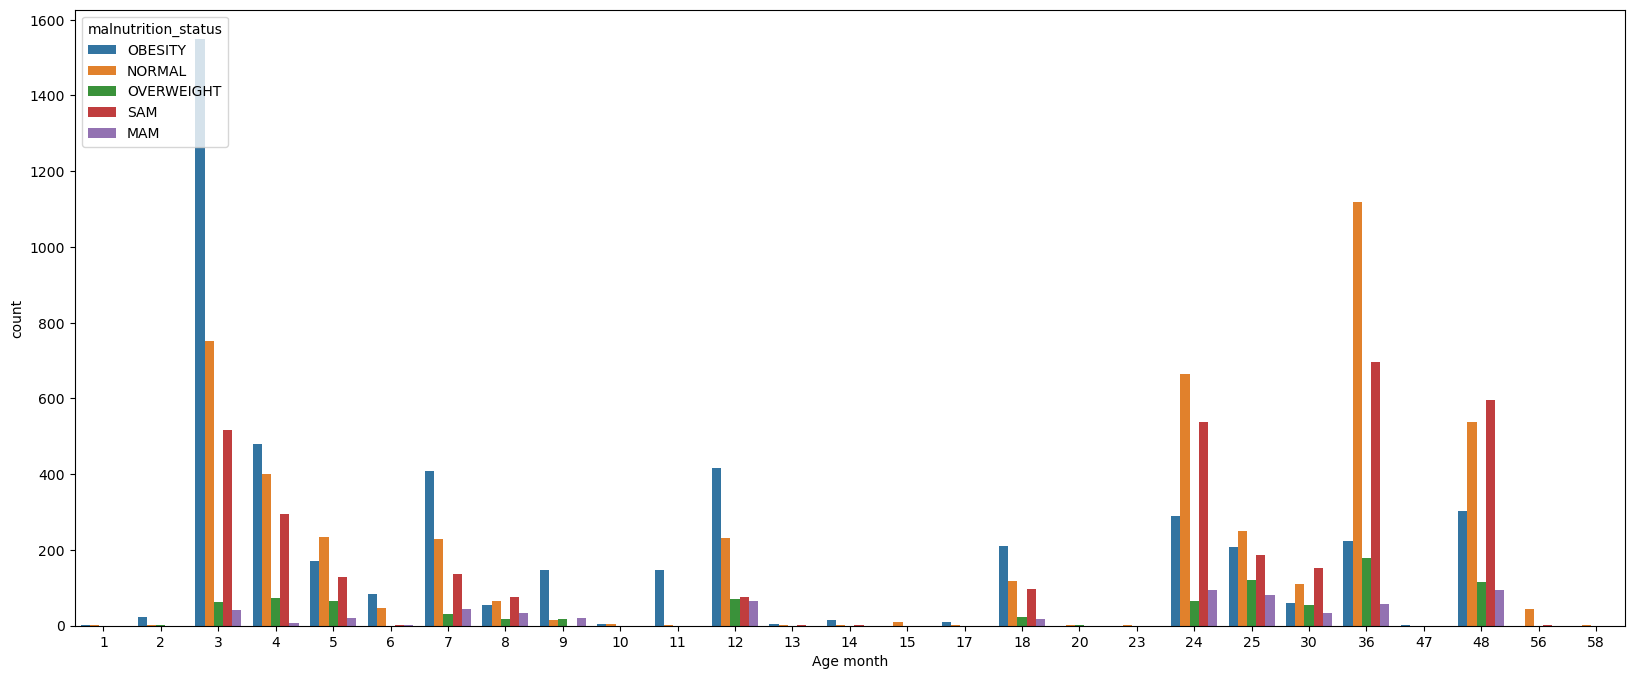

In [47]:
plt.figure(figsize=(20,8))
plt.legend(loc='upper right', title='malnutrition_status')
sns.countplot(x="Age month", hue="malnutrition_status", data=dataframe)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:xlabel='Age of mom', ylabel='count'>

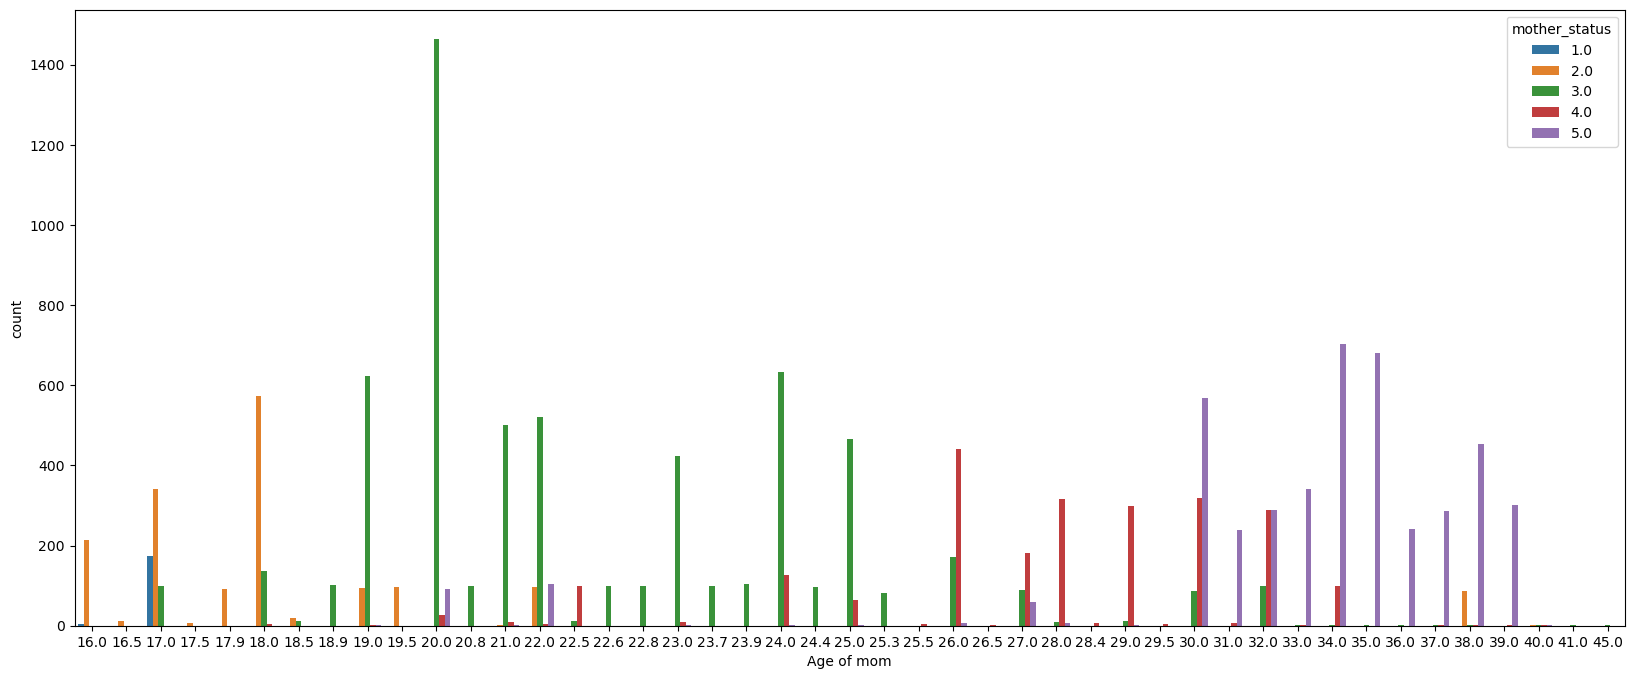

In [48]:
plt.figure(figsize=(20,8))
plt.legend(loc='upper right', title='mother_status')
sns.countplot(x="Age of mom", hue="mother_status", data=dataframe)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

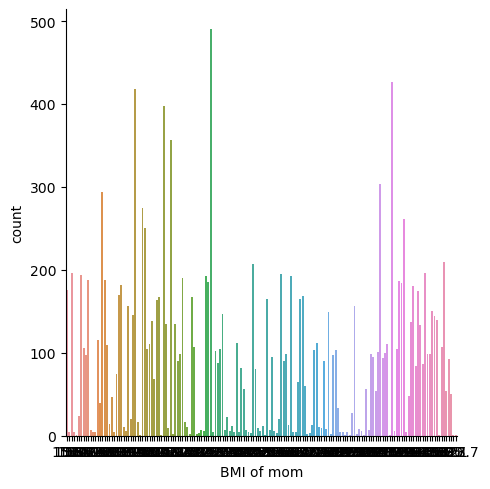

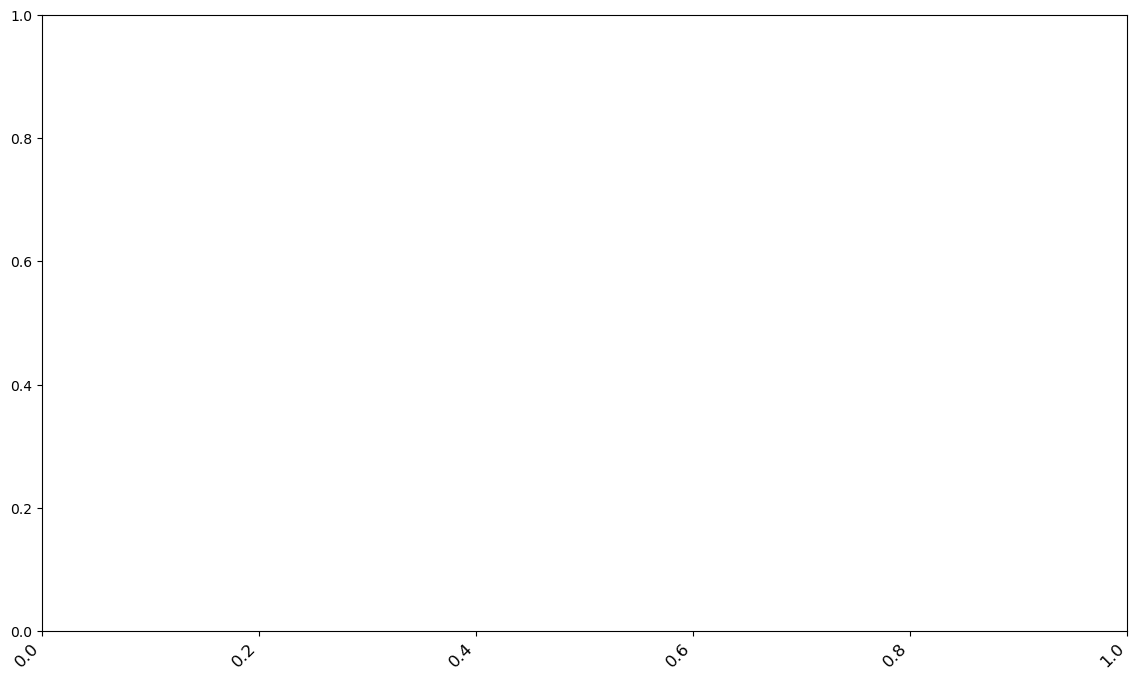

In [49]:
sns.catplot(x="BMI of mom", kind="count", data=dataframe)
plt.figure(figsize=(14,8)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
#plt.figure(figsize=(1000,2000),dpi=80)

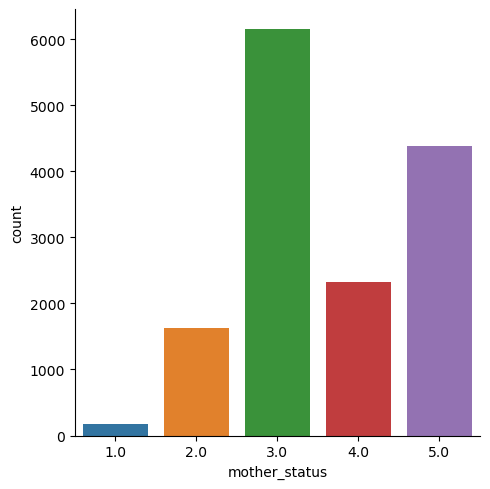

In [50]:
sns.catplot(x="mother_status", kind="count", data=dataframe)

<Figure size 80000x160000 with 0 Axes>

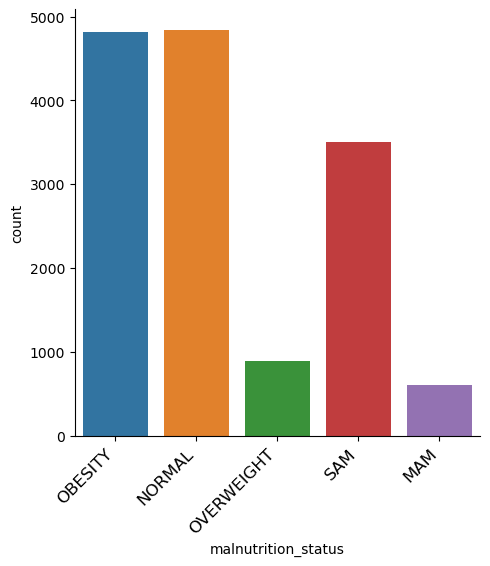

<Figure size 80000x160000 with 0 Axes>

In [51]:
sns.catplot(x="malnutrition_status", kind="count", data=dataframe)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.figure(figsize=(1000,2000),dpi=80)

<Figure size 80000x160000 with 0 Axes>

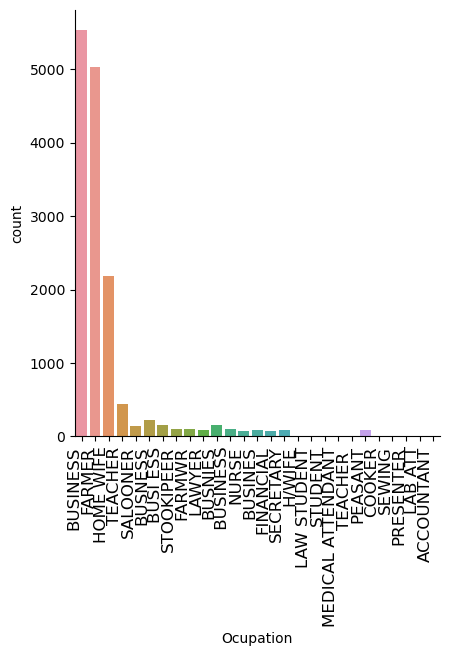

<Figure size 80000x160000 with 0 Axes>

In [52]:
sns.catplot(x="Ocupation", kind="count", data=dataframe)
#plt.figure(figsize=(14,8)) 
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.figure(figsize=(1000,2000),dpi=80)

<Figure size 80000x160000 with 0 Axes>

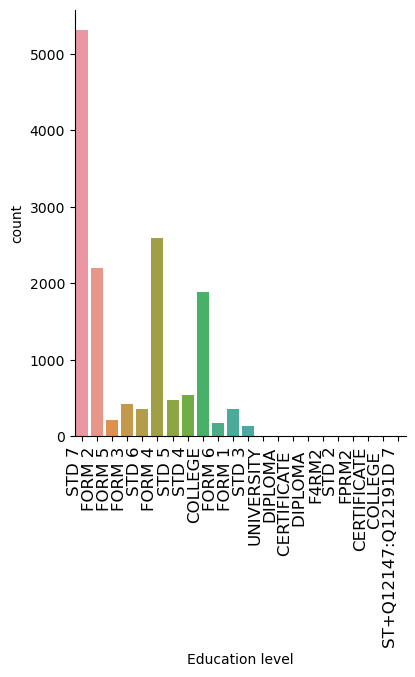

<Figure size 80000x160000 with 0 Axes>

In [53]:
sns.catplot(x="Education level", kind="count", data=dataframe)
#plt.figure(figsize=(14,8)) 
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.figure(figsize=(1000,2000),dpi=80)

<Figure size 80000x160000 with 0 Axes>

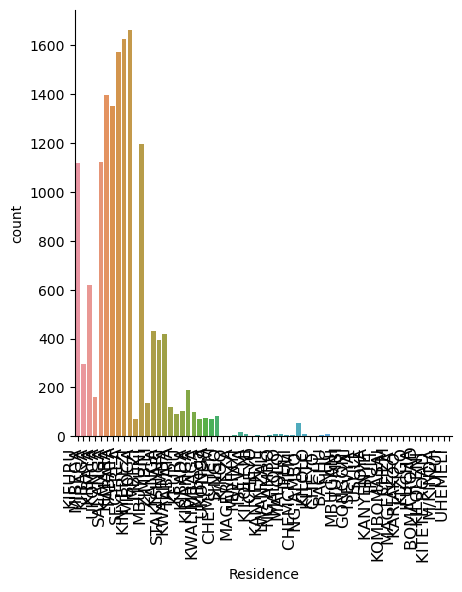

<Figure size 80000x160000 with 0 Axes>

In [54]:
sns.catplot(x="Residence", kind="count", data=dataframe)
#plt.figure(figsize=(14,8)) 
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.figure(figsize=(1000,2000),dpi=80)

<Figure size 80000x160000 with 0 Axes>

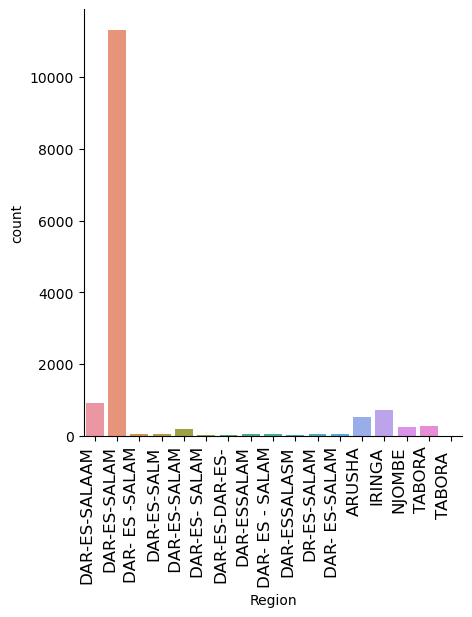

<Figure size 80000x160000 with 0 Axes>

In [55]:
sns.catplot(x="Region", kind="count", data=dataframe)
#plt.figure(figsize=(14,8)) 
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.figure(figsize=(1000,2000),dpi=80)

<Figure size 80000x160000 with 0 Axes>

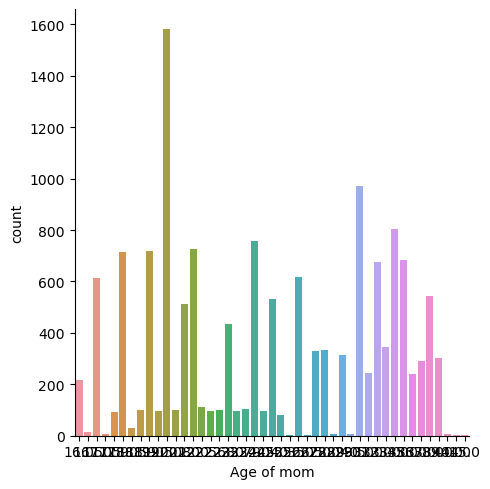

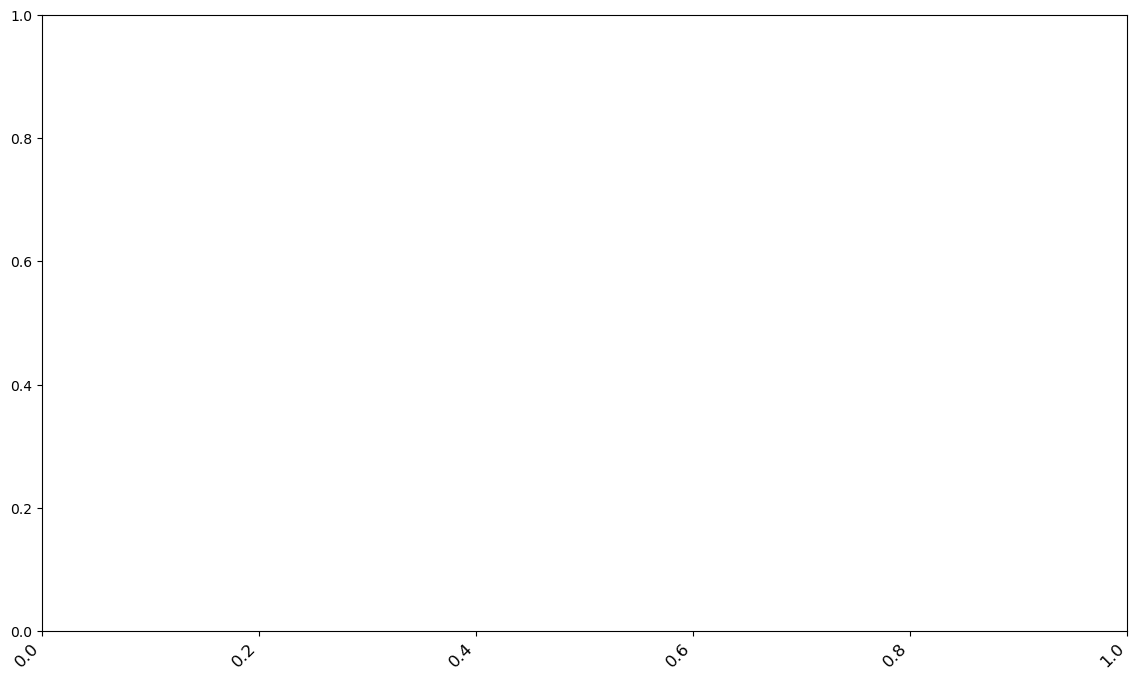

<Figure size 80000x160000 with 0 Axes>

In [56]:
sns.catplot(x="Age of mom", kind="count", data=dataframe)
plt.figure(figsize=(14,8)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.figure(figsize=(1000,2000),dpi=80)

<Figure size 80000x160000 with 0 Axes>

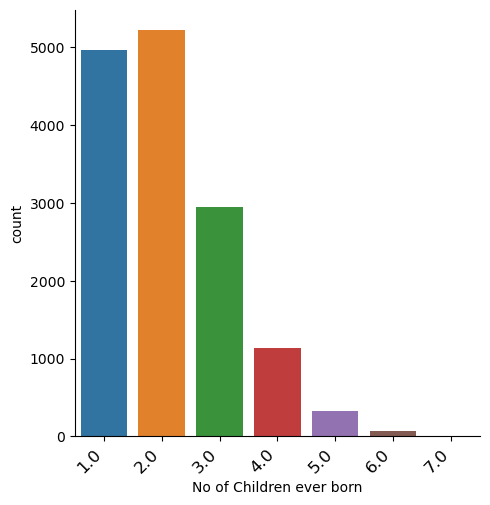

<Figure size 80000x160000 with 0 Axes>

In [57]:
sns.catplot(x="No of Children ever born", kind="count", data=dataframe)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.figure(figsize=(1000,2000),dpi=80)

<Figure size 1400x800 with 0 Axes>

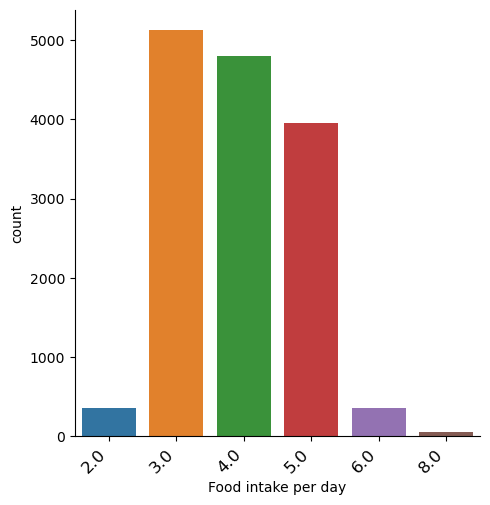

<Figure size 1400x800 with 0 Axes>

In [58]:
sns.catplot(x="Food intake per day", kind="count", data=dataframe)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.figure(figsize=(14,8)) 
#plt.figure(figsize=(1000,2000),dpi=80)

<Figure size 1400x800 with 0 Axes>

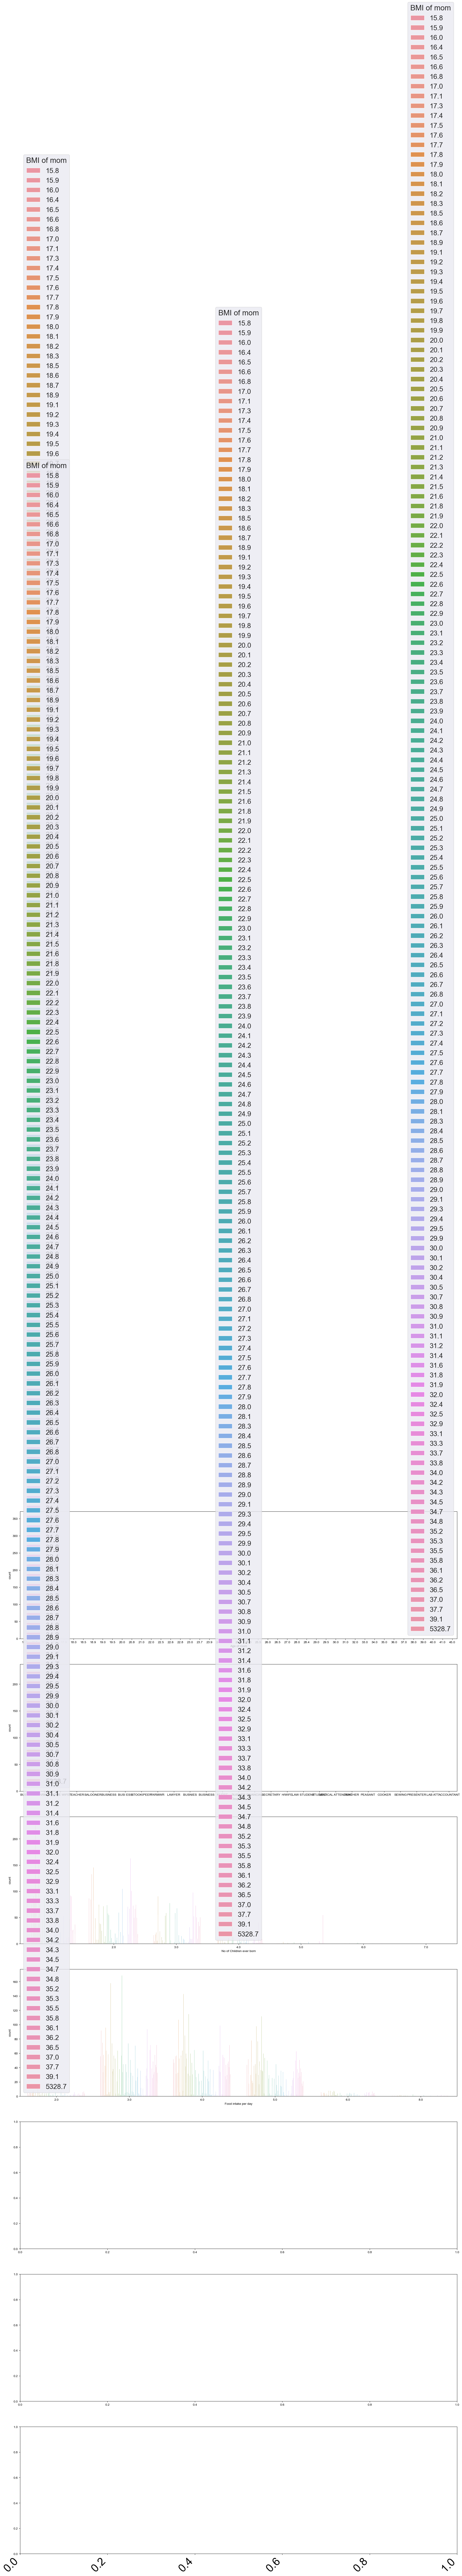

<Figure size 1400x800 with 0 Axes>

In [59]:

f, axes = plt.subplots(7, 1, figsize=[25, 60])
sns.set(font_scale = 2)
plt.rcParams["axes.labelsize"] = 15
sns.countplot('Age of mom', hue= 'BMI of mom', data=dataframe, ax=axes[0])
sns.countplot('Ocupation', hue= 'BMI of mom', data=dataframe, ax=axes[1])
sns.countplot('No of Children ever born', hue= 'BMI of mom', data=dataframe, ax=axes[2])
sns.countplot('Food intake per day', hue= 'BMI of mom', data=dataframe, ax=axes[3])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.figure(figsize=(14,8)) 



In [60]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14662 entries, 0 to 17402
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age month                 14662 non-null  int64  
 1   Height in cm              14662 non-null  float64
 2   Weight kg                 14662 non-null  float64
 3   Sex                       14662 non-null  object 
 4   Food intake per day       14662 non-null  float64
 5   Food group consumed       14662 non-null  object 
 6   Age of mom                14662 non-null  float64
 7   BMI of mom                14662 non-null  float64
 8   Height of mom             14662 non-null  float64
 9   Weight of mom in kg       14662 non-null  float64
 10  Education level           14662 non-null  object 
 11  Region                    14662 non-null  object 
 12  Residence                 14662 non-null  object 
 13  Ocupation                 14662 non-null  object 
 14  No of 

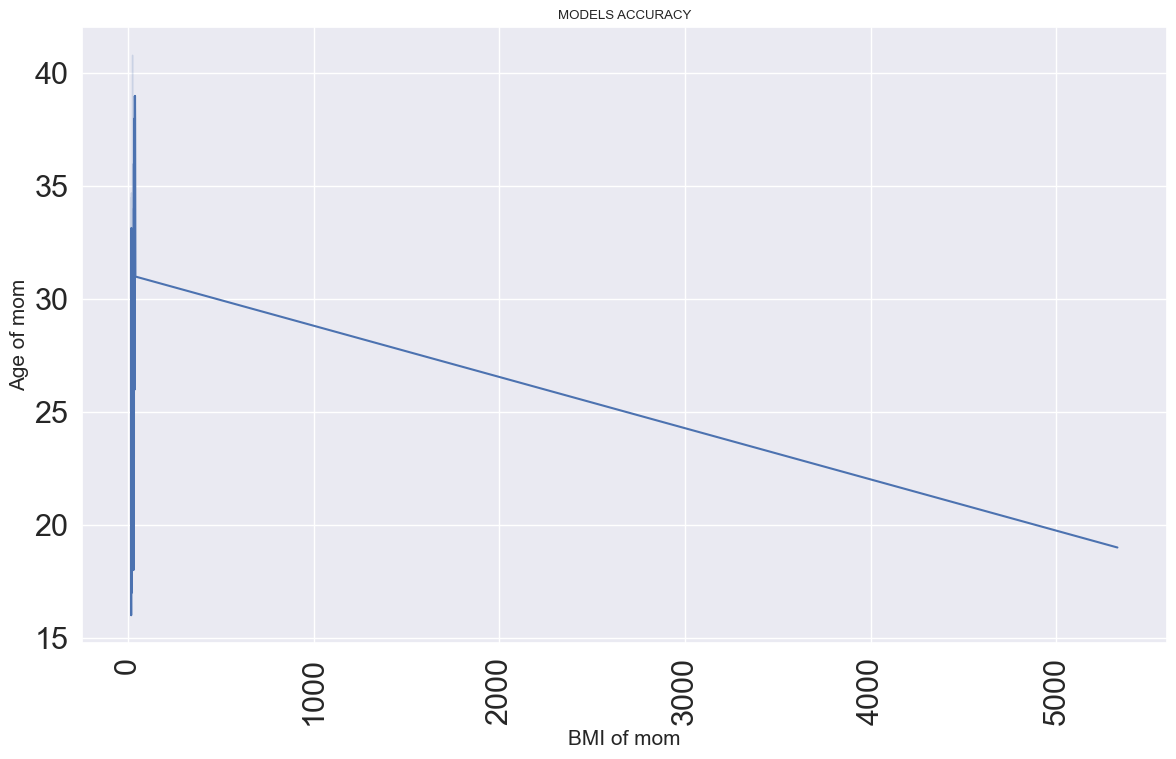

In [61]:
plt.figure(figsize=(14,8))    
sns.lineplot(x="BMI of mom", y="Age of mom",markers = True, data=dataframe) 
plt.tick_params(axis='x', rotation=90)
sns.set(font_scale=2)
# Setting the scale of the plot
sns.set_context("paper")
plt.title('MODELS ACCURACY')
plt.savefig("figure12.jpg", dpi = 300)  
plt.show()

## Droping unnessesary column

In [62]:
dataframe.drop(['Education level', 'Region', 'Residence','Ocupation'], axis='columns', inplace=True)

## Generating matrix features

In [63]:
X = dataframe.iloc[:,0:-1].values

## Generating dependent variable vectors

In [64]:
y = dataframe.iloc[:,-1].values

##  Encoding categorical value

In [65]:
#import hot encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Encoding categorical variables
def  encode_data(X):
    LE = LabelEncoder()
    X[:,0] = np.array(LE.fit_transform(X[:,0]))
    X[:,1] = np.array(LE.fit_transform(X[:,1]))
    X[:,2] = np.array(LE.fit_transform(X[:,2]))
    X[:,3] = np.array(LE.fit_transform(X[:,3]))
    X[:,4] = np.array(LE.fit_transform(X[:,4]))
    X[:,5] = np.array(LE.fit_transform(X[:,5]))
    X[:,6] = np.array(LE.fit_transform(X[:,6]))
    X[:,7] = np.array(LE.fit_transform(X[:,7]))
    X[:,8] = np.array(LE.fit_transform(X[:,8]))
    X[:,9] = np.array(LE.fit_transform(X[:,9]))
    X[:,10] = np.array(LE.fit_transform(X[:,10]))
    X[:,11] = np.array(LE.fit_transform(X[:,11]))
    X[:,12] = np.array(LE.fit_transform(X[:,12]))
   

In [66]:
encode_data(X)

In [67]:
X

array([[3, 4, 33, ..., 3, 3, 2],
       [3, 29, 60, ..., 2, 3, 4],
       [7, 49, 51, ..., 4, 3, 4],
       ...,
       [22, 42, 51, ..., 0, 3, 2],
       [19, 39, 47, ..., 0, 3, 2],
       [19, 39, 45, ..., 0, 3, 3]], dtype=object)

## Split dataset

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Handling data imbalance

In [69]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 0
Before OverSampling, counts of label '0': 0 



In [67]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 2)
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
#sm = SMOTE(random_state = 2)
#X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

## Machine Learning Implementation

## Naive Bayes

## SMOTE To check Imbalanced data

In [70]:
# check version number
import imblearn
print(imblearn.__version__)

0.9.1


In [71]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 0
Before OverSampling, counts of label '0': 0 



## Building random forest model

In [72]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14662 entries, 0 to 17402
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age month                 14662 non-null  int64  
 1   Height in cm              14662 non-null  float64
 2   Weight kg                 14662 non-null  float64
 3   Sex                       14662 non-null  object 
 4   Food intake per day       14662 non-null  float64
 5   Food group consumed       14662 non-null  object 
 6   Age of mom                14662 non-null  float64
 7   BMI of mom                14662 non-null  float64
 8   Height of mom             14662 non-null  float64
 9   Weight of mom in kg       14662 non-null  float64
 10  No of Children ever born  14662 non-null  float64
 11  Mom Food intake per day   14662 non-null  object 
 12  mother_status             14662 non-null  float32
 13  malnutrition_status       14662 non-null  object 
dtypes: flo

In [73]:
#Create a Gaussian Classifier
model=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [74]:
y_pred

array(['OBESITY', 'NORMAL', 'OBESITY', ..., 'SAM', 'OBESITY', 'MAM'],
      dtype=object)

##  Model accuracy

In [75]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9785202863961814


In [76]:
scores = cross_val_score(model,X,y, cv = 5,scoring = "accuracy")
print(scores)

[0.91169451 0.81520627 0.96793997 0.97169168 0.89938608]


In [77]:
y_probas_forest = cross_val_score(model, X_train, y_train, cv=5)

In [79]:
y_probas_forest

array([0.97570332, 0.97357204, 0.97314578, 0.97229327, 0.97569296])

In [80]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_score(model, X, y, cv=5)

#fig, ax = plt.subplots()
#ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
#ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
#ax.set_xlabel("Measured")
#ax.set_ylabel("Predicted")
#plt.show()

In [81]:
predicted

array([0.90180702, 0.83668599, 0.96691678, 0.97066849, 0.8973397 ])

## Testing the model

In [82]:
model.predict([[4,34,54,1,1,6,36,6152,26,85,2,3,4]])

array(['OVERWEIGHT'], dtype=object)

## Cnvert array to data frame

In [83]:
# convert numpy array to dataframe
df = pd.DataFrame(X, columns =['Age month', 'Height in cm', 'Weight kg','Sex','Food intake per day','Food group consumed','Age of mom','BMI of mom','Height of mom','Weight of mom in kg','No of Children ever born','Mom Food intake per day','mother_status'])

In [84]:
df

,Age month,Height in cm,Weight kg,Sex,Food intake per day,Food group consumed,Age of mom,BMI of mom,Height of mom,Weight of mom in kg,No of Children ever born,Mom Food intake per day,mother_status
0,3,4,33,1,1,6,20,61,34,46,3,3,2
1,3,29,60,1,1,6,33,138,22,75,2,3,4
2,7,49,51,1,3,6,37,155,30,90,4,3,4
3,4,34,54,1,1,6,36,152,26,85,2,3,4
4,9,40,55,1,2,6,37,147,17,79,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14657,21,45,45,0,3,6,27,49,14,20,0,2,2
14658,24,57,60,0,3,6,37,63,17,31,0,3,2
14659,22,42,51,0,2,4,25,68,9,29,0,3,2
14660,19,39,47,0,2,6,10,21,38,20,0,3,2


In [85]:
dataframe

,Age month,Height in cm,Weight kg,Sex,Food intake per day,Food group consumed,Age of mom,BMI of mom,Height of mom,Weight of mom in kg,No of Children ever born,Mom Food intake per day,mother_status,malnutrition_status
0,4,49.0,8.8,MALE,3.0,"1,2,3,4,5",24.0,22.9,162.0,60.0,4.0,3,3.0,OBESITY
1,4,74.0,14.0,MALE,3.0,"1,2,3,4,5",31.0,31.6,155.0,76.0,3.0,3,5.0,OBESITY
2,8,95.0,12.0,MALE,5.0,"1,2,3,4,5",35.0,35.2,160.0,90.0,5.0,3,5.0,NORMAL
3,5,79.0,12.8,MALE,3.0,"1,2,3,4,5",34.0,34.5,157.0,85.0,3.0,3,5.0,OVERWEIGHT
4,10,85.0,13.0,MALE,4.0,"1,2,3,4,5",35.0,33.7,153.0,79.0,3.0,3,5.0,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,30,90.0,11.0,FEMALE,5.0,"1,2,3,4,5",27.0,21.6,152.0,50.0,1.0,2,3.0,NORMAL
17395,48,103.0,14.0,FEMALE,5.0,"1,2,3,4,5",35.0,23.1,153.0,54.0,1.0,3,3.0,NORMAL
17399,36,87.0,12.0,FEMALE,4.0,"1,2,3,",26.0,23.6,150.0,53.0,1.0,3,3.0,NORMAL
17401,24,84.0,11.3,FEMALE,4.0,"1,2,3,4,5",20.0,18.6,164.0,50.0,1.0,3,3.0,NORMAL


## Classification report

In [86]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy: ' +str(accuracy_score(y_test, y_pred)))

[[ 104   12    0    0   13]
 [   2 1000    2    1    2]
 [   0    1  920    0    0]
 [   0   14   11  182    0]
 [   3    2    0    0  664]]
              precision    recall  f1-score   support

         MAM       0.95      0.81      0.87       129
      NORMAL       0.97      0.99      0.98      1007
     OBESITY       0.99      1.00      0.99       921
  OVERWEIGHT       0.99      0.88      0.93       207
         SAM       0.98      0.99      0.99       669

    accuracy                           0.98      2933
   macro avg       0.98      0.93      0.95      2933
weighted avg       0.98      0.98      0.98      2933

Accuracy: 0.9785202863961814


## Heatmap visualization

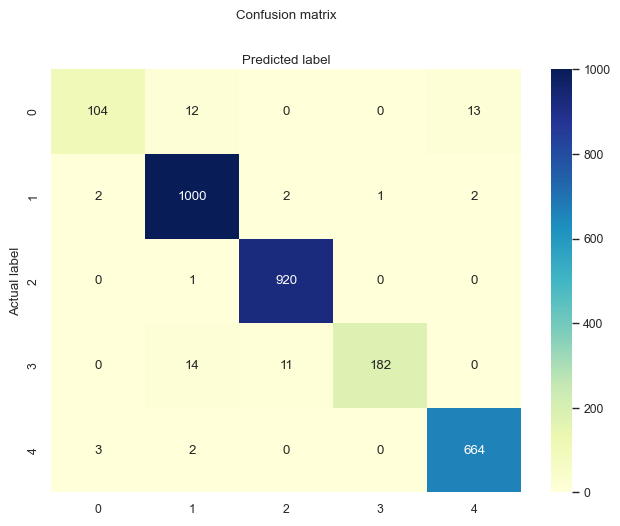

In [87]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('figure.jpg', dpi=300, bbox_inches='tight')

##  Saving the model

In [113]:
pickle.dump(model, open('kaka.h5', 'wb'))

In [92]:
joblib.dump(model, 'kakabeka.joblib')

NameError: name 'dump' is not defined

## Roc(Reveiver Operating Characteristics) Curve

In [87]:
# predict probabilities
kaka_y = model.predict_proba(X_test)

In [88]:
kaka_y = kaka_y[:, 1]

In [89]:
random_probs = [0 for _ in range(len(y_test))]

In [91]:
#ns_fpr, ns_tpr, _ = roc_curve(y_test, random_probs)
#lr_fpr, lr_tpr, _ = roc_vurve(y_test, kaka_y)

In [92]:
import imblearn 
from collections import Counter 
from imblearn.base import BaseSampler 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)

In [93]:
oversample = SMOTE()
x_resample,y_resample = oversample.fit_resample(X,y)

In [ ]:
dataframe.Sex = dataframe.Sex.map({'MALE':1, 'FEMALE':0})

In [ ]:
dataframe


In [94]:
count1 = Counter(y_resample)
count1

Counter({'OBESITY': 4843,
         'NORMAL': 4843,
         'OVERWEIGHT': 4843,
         'SAM': 4843,
         'MAM': 4843})

In [ ]:
count2 = Counter(x_resample)